In [1]:
import numpy as np
import xarray as xr
import os.path as op
import xrft
import dask.array as dsar
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM02/channel_seasonality/Darwin-for-AbuDhabi/run'

In [3]:
ys, dy = (6,60/360)
dt = 3e1
# df = 288
ts = int(360*86400*ys/4e1)
te = int(ts+360*86400*dy/dt)
print(ts,te)

4665600 4838400


In [4]:
ds = open_mdsdataset(ddir,
                    iters=range(ts+2880,te+2880,2880),
                    prefix=[
                           'PTRtave22','PTRtave23',
                           'FeTtave','MOMtave'],
                    delta_t=dt
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:    (XC: 1000, XG: 1000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 60)
Coordinates:
  * XC         (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 ...
  * YC         (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 ...
  * XG         (XG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * YG         (YG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * Z          (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1        (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu         (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zl         (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA         (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dxG        (YG, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dyG        (YC, XG) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>

In [53]:
ds15D = open_mdsdataset(ddir,
                       iters=range(ts,te+43200,43200),
                       prefix=[
                              'Snap15D'],
                       delta_t=dt
                       )
ds15D

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 5)
Coordinates:
  * XC       (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * YC       (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * XG       (XG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * YG       (YG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dxG      (YG, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dyG      (YC, XG) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000

In [83]:
dsTtave1 = open_mdsdataset(ddir,
                        iters=range(64800,4665600+64800,64800),
                        prefix=[
                               'Ttave'],
                        delta_t=4e1
                        )
dsTtave1

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 72)
Coordinates:
  * XC       (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * YC       (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * XG       (XG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * YG       (YG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dxG      (YG, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dyG      (YC, XG) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 100

In [85]:
dsTtave2 = open_mdsdataset(ddir,
                        iters=range(ts+2880,te+2880,2880),
                        prefix=[
                               'Ttave'],
                        delta_t=3e1
                        )
dsTtave2

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 2000, YG: 2000, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 60)
Coordinates:
  * XC       (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * YC       (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * XG       (XG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * YG       (YG) >f4 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 7000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dxG      (YG, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    dyG      (YC, XG) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 100

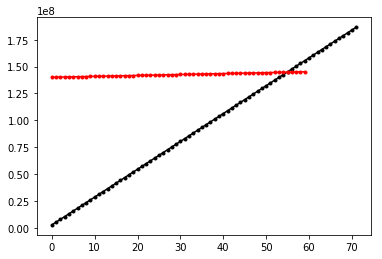

In [86]:
plt.plot(dsTtave1.time, 'k.-')
plt.plot(dsTtave2.time, 'r.-')

In [78]:
dsTtave.Z[:40]

<xarray.DataArray 'Z' (Z: 40)>
array([-5.00000e-01, -1.57000e+00, -2.79000e+00, -4.18500e+00, -5.78000e+00,
       -7.59500e+00, -9.66000e+00, -1.20100e+01, -1.46800e+01, -1.77050e+01,
       -2.11250e+01, -2.49900e+01, -2.93450e+01, -3.42400e+01, -3.97250e+01,
       -4.58550e+01, -5.26900e+01, -6.02800e+01, -6.86850e+01, -7.79650e+01,
       -8.81750e+01, -9.93700e+01, -1.11600e+02, -1.24915e+02, -1.39365e+02,
       -1.54990e+02, -1.71825e+02, -1.89900e+02, -2.09235e+02, -2.29855e+02,
       -2.51770e+02, -2.74985e+02, -2.99505e+02, -3.25320e+02, -3.52420e+02,
       -3.80790e+02, -4.10410e+02, -4.41255e+02, -4.73305e+02, -5.06540e+02],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    

In [87]:
with ProgressBar():
    T_ts1 = dsTtave1.Ttave[:,:40].mean(['Z','YC','XC']).compute()
    T_ts2 = dsTtave2.Ttave[:,:40].mean(['Z','YC','XC']).compute()

[########################################] | 100% Completed | 28.9s
[########################################] | 100% Completed | 24.6s


In [91]:
6*360*86400/3e1
1.866240000000E+08/(360*86400)

6.0

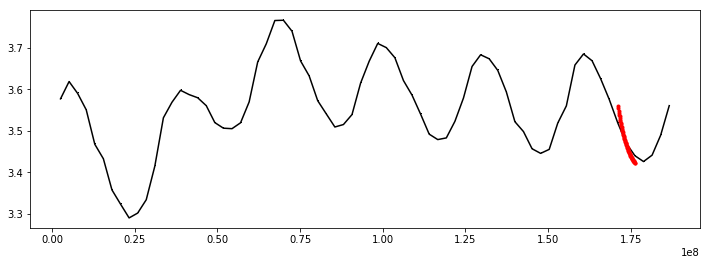

In [89]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(T_ts1.time, T_ts1, 'k,-')
ax.plot(T_ts2.time+12*30*86400, T_ts2, 'r.-')

In [7]:
grid = Grid(ds.sel(YC=slice(5.9e5,14.1e5),YG=slice(5.9e5,14.1e5)), periodic=['X'])
grid

<xgcm.Grid>
T Axis (not periodic):
  * center   time (60)
X Axis (periodic):
  * center   XC (1000) --> left
  * left     XG (1000) --> center
Z Axis (not periodic):
  * center   Z (76) --> left
  * left     Zl (76) --> center
  * outer    Zp1 (77) --> center
  * right    Zu (76) --> center
Y Axis (not periodic):
  * center   YC (820) --> outer
  * outer    YG (821) --> center

In [10]:
# ds1 = open_mdsdataset(op.join(bdir,'05km_Darmom'), grid_dir=op.join(pdir,'5km_grid'),
#                      iters=range(int(ts+360*86400*2/dt+df),te+df,df),
#                      prefix=['MOMtave'], delta_t=dt
#                     )
# ds1

In [15]:
# ds2 = open_mdsdataset(op.join(ddir,'zerores_05km_MOMbgc'), grid_dir=op.join(ddir,'5km_grid'),
#                      iters=range(ts,te,df),
#                      prefix=['MOMtave'],
#                      delta_t=dt
#                     )
# ds2

In [8]:
P1 = ds.PTRtave22
P2 = ds.PTRtave23
# Z1 = ds.TRAC08
# Z2 = ds.TRAC12
# PP = ds.PP
Fe = ds.TRAC03
w = ds.WVEL
theta = ds.THETA

In [9]:
P1.attrs

OrderedDict([('standard_name', 'TRAC22'),
             ('long_name', 'Phy1 concentration'),
             ('units', 'mM/m^3')])

In [11]:
P = P1+P2
P

<xarray.DataArray (time: 60, Z: 76, YC: 2000, XC: 1000)>
dask.array<shape=(60, 76, 2000, 1000), dtype=float32, chunksize=(1, 76, 2000, 1000)>
Coordinates:
  * XC       (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * YC       (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    rA       (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    Depth    (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(76, 2000, 1000), chunksize=(76, 2000, 1000)>
    iter     (time) int64 dask.array<shape=(60,), chunksize=(1,)>
  * time     (time) float64 1.401e+08 1.401e+08 1.402e+08 1.403e+08 ...

In [50]:
P.Z

<xarray.DataArray 'Z' (Z: 76)>
array([-5.000000e-01, -1.570000e+00, -2.790000e+00, -4.185000e+00,
       -5.780000e+00, -7.595000e+00, -9.660000e+00, -1.201000e+01,
       -1.468000e+01, -1.770500e+01, -2.112500e+01, -2.499000e+01,
       -2.934500e+01, -3.424000e+01, -3.972500e+01, -4.585500e+01,
       -5.269000e+01, -6.028000e+01, -6.868500e+01, -7.796500e+01,
       -8.817500e+01, -9.937000e+01, -1.116000e+02, -1.249150e+02,
       -1.393650e+02, -1.549900e+02, -1.718250e+02, -1.899000e+02,
       -2.092350e+02, -2.298550e+02, -2.517700e+02, -2.749850e+02,
       -2.995050e+02, -3.253200e+02, -3.524200e+02, -3.807900e+02,
       -4.104100e+02, -4.412550e+02, -4.733050e+02, -5.065400e+02,
       -5.409350e+02, -5.764650e+02, -6.131100e+02, -6.508550e+02,
       -6.896850e+02, -7.295950e+02, -7.705850e+02, -8.126600e+02,
       -8.558350e+02, -9.001350e+02, -9.455950e+02, -9.922600e+02,
       -1.040180e+03, -1.089425e+03, -1.140080e+03, -1.192235e+03,
       -1.246005e+03, -1.301520

In [77]:
# P1yr = xr.DataArray(P[-360:,:34].data, dims=P.dims,
#                    coords={'time':(P.time[-360:].data-P.time[-360].data)/86400,
#                           'Z':np.flipud(np.abs(P.Z.data)[:34]),
#                           'YC':P.YC.data,'XC':P.XC.data},
#                    attrs=P1.attrs)
P1yr = P[-360:,:34]
P1yr = P1yr.drop('Z')
P1yr.coords['Z'] = ('Z', -P.Z.data[33]+P.Z.data[:34])
P1yr
# Fe1yr = xr.DataArray(Fe[-360:,:34].data, dims=Fe.dims,
#                     coords={'time':(Fe.time[-360:].data-Fe.time[-360].data)/86400,
#                              'Z':np.flipud(np.abs(Fe.Z.data)[:34]),
#                              'YC':Fe.YC.data,'XC':Fe.XC.data},
#                     attrs=Fe.attrs)
# print(P1yr.time, Fe1yr.time)

<xarray.DataArray (time: 360, Z: 34, YC: 400, XC: 200)>
dask.array<shape=(360, 34, 400, 200), dtype=float32, chunksize=(1, 34, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    drF      (Z) >f4 dask.array<shape=(34,), chunksize=(34,)>
    PHrefC   (Z) >f4 dask.array<shape=(34,), chunksize=(34,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(34, 400, 200), chunksize=(34, 400, 200)>
    iter     (time) int64 dask.array<shape=(360,), chunksize=(1,)>
  * time     (time) float64 2.551e+09 2.551e+09 2.551e+09 2.551e+09 ...
  * Z        (Z) float32 324.82 323.75 322.53 321.135 319.54 317.725 315.66 ...
Attributes:
    standard_name:  TRAC22
    long_name:      Phy1 concentration
    units:          mM/m^3

<xarray.DataArray 'Z' ()>
array(0., dtype=float32)
Coordinates:
    drF      >f4 dask.array<shape=(), chunksize=()>
    PHrefC   >f4 dask.array<shape=(), chunksize=()>
    Z        float32 0.0


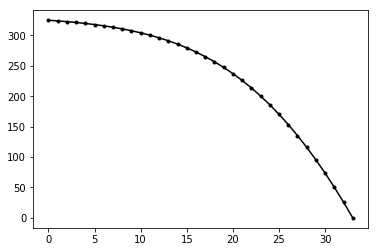

In [78]:
print(P1yr.Z[-1])
plt.plot(P1yr.Z.data, 'k.-')

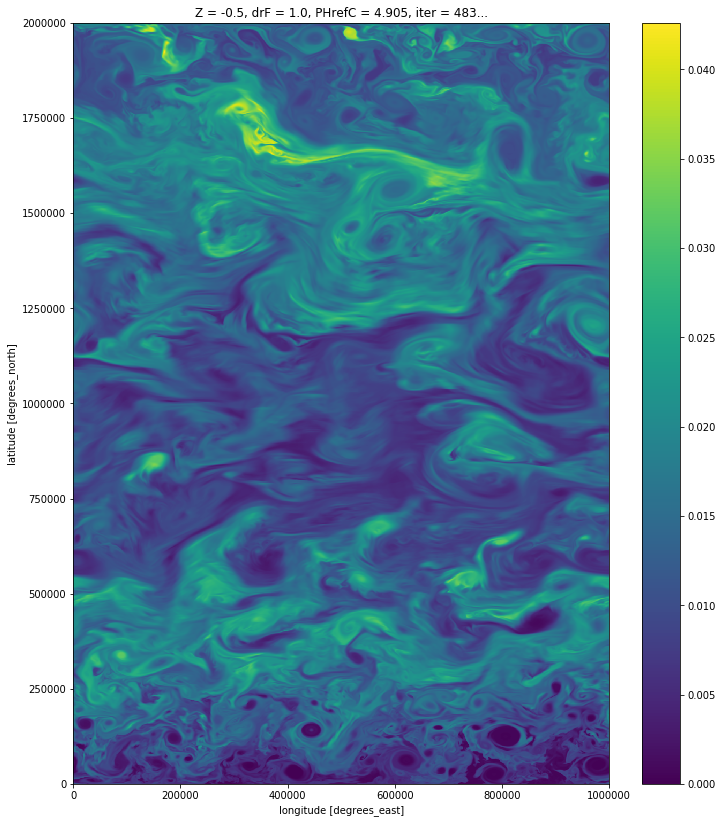

In [12]:
P[-1,0].plot(figsize=(12,14))

In [79]:
dsave = P1yr.to_dataset(name='Ptot')
# dsave['FeT'] = Fe1yr
dsave.to_netcdf(op.join(pdir,'P_05km_flipped.nc'))

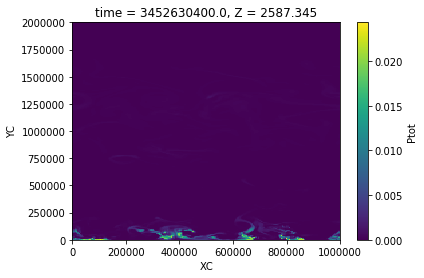

In [227]:
dsave.Ptot[0,-1].plot()

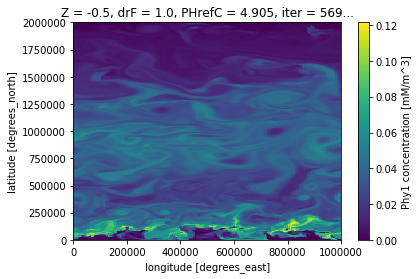

In [62]:
P[-60,0].plot()

In [35]:
# P1.coords['days'] = ('time',np.tile(range(360),dy))
# P2.coords['days'] = ('time',np.tile(range(360),dy))
# Z1.coords['days'] = ('time',np.tile(range(360),dy))
# Z2.coords['days'] = ('time',np.tile(range(360),dy))
# PP.coords['days'] = ('time',np.tile(range(360),dy))
# with ProgressBar():
#     P1day = P1.groupby('days').mean(['time']).compute()
#     P2day = P2.groupby('days').mean(['time']).compute()
#     Z1day = Z1.groupby('days').mean(['time']).compute()
#     Z2day = Z2.groupby('days').mean(['time']).compute()
#     PPday = PP.groupby('days').mean(['time']).compute()

[########################################] | 100% Completed | 12min 26.0s
[########################################] | 100% Completed | 20min 50.4s
[########################################] | 100% Completed | 21min 29.4s


In [ ]:
nz = 22
with ProgressBar():
    P1Cday = (grid.cumsum(P1.sel(YC=slice(6e5,14e5))*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2.sel(YC=slice(6e5,14e5))*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     P1Cintg = (P1day*ds.drF).sum('Z').compute()
#     P2Cintg = (P2day*ds.drF).sum('Z').compute()
#     Z1Cintg = (Z1day*ds.drF).sum('Z').compute()
#     Z2Cintg = (Z2day*ds.drF).sum('Z').compute()
PtotCday = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5))
# PPCday = PPday*106.*12.

[###                                     ] | 7% Completed |  5min 41.4s

In [ ]:
# with ProgressBar():
#     Ptot = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5)).compute()
# Ptot

In [31]:
# colors = Ptot.days.data[:,np.newaxis,np.newaxis]*np.ones((160,200))+1.

# fig, ax = plt.subplots(figsize=(6,5))
# fig.set_tight_layout(True)
# for i in range(360):
#     if i == 0:
#         im = ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
#                        c=colors[i], alpha=360./(360.+3*i),
#                        s=1., vmin=1., vmax=360., rasterized=True
#                        )
#     else:
#         ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
#                   c=colors[i], alpha=360./(360.+3*i),
#                   s=1., vmin=1., vmax=360., rasterized=True
#                   )
# ax.set_xscale('log')
# ax.set_xlim([2e-3,2e0])
# ax.set_ylim([0.,1.])
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label(r"Days", fontsize=12)
# ax.set_xlabel(r"P$_{1+2}$ [mg Chl m$^{-3}$]", fontsize=14)
# ax.set_ylabel(r"Percentage of P$_1$ (P$_1$/P$_{1+2}$)", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig(op.join(ddir,'Figures/P1vsP_05km.pdf'))

In [22]:
# modisdir = '/swot/SUM05/takaya/MODIS/CbPM/'
# cbpm = xr.open_dataset(op.join(modisdir,'CbPM_40-70S.nc')).carbon
# c_ker = cbpm.sel(lon=slice(100,150))

# years = range(2003,2017)
# months = np.tile(range(12), len(years))
# c_ker.coords['iMONTH'] = ('iTIME', months)

# with ProgressBar():
#     c_ker_mon = c_ker.groupby('iMONTH').mean('iTIME').compute()
    
# c_ker_mon

viirsdir = '/swot/SUM05/takaya/VIIRS/monthly/'
cbpm = xr.open_dataset(op.join(viirsdir,'CbPM-VIIRS-monthly_40-70S.nc')).cbpm
cbpm_ker = cbpm.sel(lon=slice(100,150))
c = xr.open_dataset(op.join(viirsdir,'Carbon-VIIRS-monthly_40-70S.nc')).carbon
c_ker = c.sel(lon=slice(100,150))
print(c_ker.attrs)

# c_ker.coords['iMONTH'] = ('iTIME', months)

with ProgressBar():
    cbpm_ker_mon = cbpm_ker.groupby('months').mean('iTIME').compute()
    c_ker_mon = c_ker.groupby('months').mean('iTIME').compute()
    cbpm_ker_std = cbpm_ker.groupby('months').std(['iTIME','lat','lon']).compute()
    c_ker_std = c_ker.groupby('months').std(['iTIME','lat','lon']).compute()
del c, cbpm, c_ker, cbpm_ker
    
c_ker_mon

OrderedDict([('units', 'mg C m-3')])


<xarray.DataArray 'carbon' (months: 12, lat: 180, lon: 300)>
array([[[15.112427, 14.852038, ..., 12.71562 , 12.428508],
        [15.321337, 15.516882, ..., 12.616169, 12.885255],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.136292, 15.66229 , ..., 11.292799, 11.285312],
        [15.517662, 15.276718, ..., 11.046855, 10.657256],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[13.21138 , 12.787419, ..., 17.215484, 17.393421],
        [12.773817, 13.044801, ..., 17.452012, 16.252701],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.93975 , 16.80695 , ..., 16.324605, 16.893064],
        [16.262466, 16.190208, ..., 16.751794, 16.669233],
        ...,
        [      nan,       nan, ...,       

In [10]:
cafedir = '/swot/SUM05/takaya/CAFE/'
decaf = loadmat(op.join(cafedir,'CAFE'), appendmat=True)
cafe = decaf['CAFE']
lat = decaf['Lat1']
lon = decaf['Lon1']
ppcb = np.zeros((12,180,360))
for i in range(12):
    ppcb[i] = cafe[:,:,i]
    
decaf = xr.DataArray(ppcb, dims=['month','lat','lon'],
                 coords={'month':range(1,13),'lat':lat[:,0],'lon':lon[0,:]}
                 ).to_dataset(name='carbon')
decaf_SO = decaf.sel(lat=slice(-45,-65),lon=slice(50,180))
del decaf, ppcb
decaf_SO

<xarray.Dataset>
Dimensions:  (lat: 20, lon: 130, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 ...
  * lon      (lon) float64 50.5 51.5 52.5 53.5 54.5 55.5 56.5 57.5 58.5 59.5 ...
Data variables:
    carbon   (month, lat, lon) float64 635.4 618.2 587.5 501.0 514.8 526.0 ...

In [ ]:
# P1_intg = (P1*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P2_intg = (P2*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P1_intg

In [43]:
# sosedir = '/swot/SUM05/takaya/SOSE'
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_Phyto.nc'))
# P_sose = sose.phyto
# P_sose.attrs = sose.phyto.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# P_sose.coords['iTIME'] = ('iTIME',range(609))
# P_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# P_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# P_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# P_kersurf = (P_sose*P_sose.iDEPTH)[:,:12].sum('iDEPTH').sel(iLON=slice(100,140)) * 1e-2
# del P_sose
# DinY = np.tile(range(121),5)
# P_kersurf = P_kersurf[:-4]
# P_kersurf.coords['DinY'] = ('iTIME',DinY)
# P_kersurf = P_kersurf.groupby('DinY').mean('iTIME')

# P_kersurf

In [42]:
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_NPP.nc'))
# PP_sose = sose.NPP
# print(sose.NPP.attrs)
# PP_sose.attrs = sose.NPP.attrs

# PP_sose.coords['iTIME'] = ('iTIME',range(609))
# PP_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# PP_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# PP_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# PP_kersurf = (PP_sose*PP_sose.iDEPTH).sel(iLON=slice(100,140)).sum('iDEPTH')
# del PP_sose, gridSOSE
# DinY = np.tile(range(121),5)
# PP_kersurf = PP_kersurf[:-4]
# PP_kersurf.coords['DinY'] = ('iTIME',DinY)
# PP_kersurf = PP_kersurf.groupby('DinY').mean('iTIME')

In [18]:
# dssave = P_kersurf.to_dataset(name='Phyto_100m')
# dssave['Prod_intg'] = PP_kersurf
# dssave.to_netcdf(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))

In [11]:
sosedir = '/swot/SUM05/takaya/SOSE'
dsSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))
P_kersurf = dsSOSE.Phyto_100m
PP_kersurf = dsSOSE.Prod_intg

In [37]:
PPintg = (PPCday*ds.hFacC*ds.drF).sum(dim='Z')
PPintg

<xarray.DataArray (days: 360, YC: 400, XC: 200)>
dask.array<shape=(360, 400, 200), dtype=float32, chunksize=(360, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    rA       (YC, XC) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [82]:
PPintg.sel(YC=slice(6e5,14e5)).mean(['XC','YC']).sum('days').values

array(0.5430186, dtype=float32)

In [83]:
0.5430186/0.34280667

1.5840374401116526

In [38]:
# bl = xr.open_dataset(op.join(ddir,'KPPbl_99percen_5km.nc')).KPPbl
# bl.coords['days'] = ('time',np.tile(range(360),10))
# bl_day = bl.groupby('days').mean(['time'])
# bl_day
XLD = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_05km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD = XLD.groupby('day').mean(['time'])
MXLD

<xarray.DataArray 'hbl99' (day: 360, YC: 400)>
array([[   0.      , 1604.726008, 1585.633965, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1604.625369, 1585.545819, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1602.901272, 1585.351765, ...,   30.      ,   30.      ,
          30.      ],
       ...,
       [   0.      , 1606.382272, 1588.941428, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1606.185913, 1587.905113, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1606.171797, 1587.74965 , ...,   30.      ,   30.      ,
          30.      ]])
Coordinates:
  * YC       (YC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [14]:
PintgC = ((P1+P2)*106*12*ds.hFacC*ds.drF).sum(dim='Z')
r = np.log(PintgC[1:]/PintgC[:-1].data) * PintgC.time.diff('time',1)**-1
tnew = .5*(ds.time.data[1:]+ds.time.data[:-1])
func = pchip(tnew, r, axis=0)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:253: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:121: RuntimeWarning: invalid value encountered in greater
  mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))


In [15]:
r = xr.DataArray(func(ds.time.data), dims=P1[:,0].dims, coords=P1[:,0].coords)
r*86400

<xarray.DataArray (time: 3600, YC: 400, XC: 200)>
array([[[      nan,       nan, ...,       nan,       nan],
        [-0.070491, -0.056564, ..., -0.082598, -0.094262],
        ...,
        [ 0.010594,  0.017015, ...,  0.002886,  0.000474],
        [ 0.00161 ,  0.005363, ..., -0.019826, -0.004835]],

       [[      nan,       nan, ...,       nan,       nan],
        [-0.057856, -0.056785, ..., -0.105224, -0.085297],
        ...,
        [ 0.014099,  0.009404, ...,  0.001122,  0.007106],
        [ 0.00376 ,  0.005119, ..., -0.013779, -0.00141 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [-0.0526  , -0.048837, ..., -0.079621, -0.067137],
        ...,
        [ 0.009566,  0.0088  , ...,  0.012636,  0.010749],
        [ 0.009318,  0.009599, ...,  0.008583,  0.008952]],

       [[      nan,       nan, ...,       nan,       nan],
        [-0.053635, -0.050893, ..., -0.079192, -0.067097],
        ...,
        [ 0.009935,  0.008808, ...,  0.012476,  0.010

In [16]:
# l = mu - r
r.coords['days'] = ('time',np.tile(range(360),dy))
# mu.coords['days'] = ('time',np.tile(range(360),dy))
# l.coords['days'] = ('time',np.tile(range(360),dy))
# FadvW_d = ds.ADVrTr03
# dfib_d = ds.DFrITr03
# FadvW_d.coords['days'] = ('time',np.tile(range(360),dy))
# dfib_d.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    rday = r.groupby('days').mean('time').compute()
#     FadvW_d = (grid.diff(FadvW_d,'Zl',boundary='fill'))[:,22].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     dfib_d = dfib_d[:,22].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     muday = mu.groupby('days').mean('time')
#     lday = l.groupby('days').mean('time')

[########################################] | 100% Completed |  0.1s


In [40]:
# diff = ds.DFrITr03
# diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA*ds.drF)
# advW = ds.ADVrTr03
# # advV = ds.ADVyTr03
# adv_z = grid.diff(advW,'Z',boundary='fill')/(ds.rA*ds.drF)
# # advy = grid.diff(advV, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')

# diff_z.coords['days'] = ('time',np.tile(range(360),dy))
# adv_z.coords['days'] = ('time',np.tile(range(360),dy))


# with ProgressBar():
#     dff_z_100 = diff_z[:,21].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     adv_z_100 = adv_z[:,21].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    
# adv_z_100

In [41]:
# fig, ax = plt.subplots()
# # ax2 = ax.twinx()
# adv_z_100.plot(ax=ax, color='r')
# dff_z_100.plot(ax=ax, color='b')
# ax.set_ylim([-2.e-11,2.e-11])

In [ ]:
zz = xr.DataArray(np.abs(ds.Zl).data[np.newaxis,:,np.newaxis]*np.ones((360,400))[:,np.newaxis,:],
                 dims=['day','Zl','YC'])
nMXLD = np.argmin(np.abs(zz-MXLD), axis=1)
nXLD100 = nMXLD.data.copy()
nXLD100[nXLD100<22] = 22
nXLD100 = xr.DataArray(nXLD100, dims=nMXLD.dims, coords=nMXLD.coords)
nXLD100

In [21]:
diff = ds.DFrITr03
advW = ds.ADVrTr03
dfz_cons = diff/(ds.rA)
adz_cons = advW/(ds.rA)
# dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
# adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
# w.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
# theta.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
# Fe.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
wp = w - w.mean(['time','XC'])
# wp = w.groupby('seas') - w.groupby('seas').mean(['time','XC'])
# Tp = theta.groupby('seas') - theta.groupby('seas').mean(['time','XC'])
Fep = Fe - Fe.mean(['time','XC'])
# Fep = Fe.groupby('seas') - Fe.groupby('seas').mean(['time','XC'])
# TpFep = Tp*Fep
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
# wp.coords['day'] = ('time',np.tile(range(360),dy))
# wpFep.coords['day'] = ('time',np.tile(range(360),dy))
# TpFep.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).mean(['XC']).compute()
    adz_c = adz_cons.sel(YC=slice(6e5,14e5)).mean(['XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).mean(['XC']).compute()
    w2_sqrt = np.sqrt((wp.sel(YC=slice(6e5,14e5))**2).mean(['YC','XC'])).compute()
#     TpFep_d = TpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

# dfz_c_100 = dfz_c[:,22]
# adz_c_100 = adz_c[:,22]
# wpFep_d_100 = wpFep_d[:,22]

[########################################] | 100% Completed |  5min 20.1s
[########################################] | 100% Completed |  2min  5.0s
[########################################] | 100% Completed | 53.9s


In [11]:
dfz_c_XLD = dfz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
wpFep_c_XLD = wpFep_d.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
w2_sqrt

[########################################] | 100% Completed | 14min 30.1s
[########################################] | 100% Completed | 13min 23.7s
[########################################] | 100% Completed | 28min 58.3s
[########################################] | 100% Completed | 45.4s


<xarray.DataArray 'WVEL' (day: 360, Zl: 76)>
array([[5.070733e-07, 1.092543e-06, 2.238404e-06, ..., 3.774424e-05,
        3.327567e-05, 2.985892e-05],
       [5.057326e-07, 1.087456e-06, 2.228467e-06, ..., 3.772899e-05,
        3.329257e-05, 2.991259e-05],
       [5.045360e-07, 1.073847e-06, 2.198575e-06, ..., 3.760154e-05,
        3.322183e-05, 2.990283e-05],
       ...,
       [5.019589e-07, 1.091753e-06, 2.233647e-06, ..., 3.748161e-05,
        3.301836e-05, 2.958696e-05],
       [5.012939e-07, 1.095122e-06, 2.244101e-06, ..., 3.758615e-05,
        3.309832e-05, 2.964900e-05],
       [5.006116e-07, 1.104199e-06, 2.267563e-06, ..., 3.772117e-05,
        3.320451e-05, 2.973511e-05]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [14]:
# dsave = dfz_c_XLD.to_dataset(name='Fdiff_z')
# dsave['Fadv_z'] = adz_c_XLD
# dsave['wpFep'] = wpFep_c_XLD
# dsave.to_netcdf(op.join(bdir,'VerticalIronFluxes_XLD_05km.nc'))
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_05km.nc'))
dfz_c_XLD = dsFz.Fdiff_z
wpFep_c_XLD = dsFz.wpFep
wpFep_c_XLD

<xarray.DataArray 'wpFep' (day: 360)>
array([2.453861e-10, 2.405752e-10, 2.318069e-10, ..., 2.423379e-10,
       2.437832e-10, 2.463809e-10], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [25]:
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_20km.nc'))
dfz_20 = dsFz.Fdiff_z
wpFep_20 = dsFz.wpFep
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_20kmMLI.nc'))
dfz_20mli = dsFz.Fdiff_z
wpFep_20mli = dsFz.wpFep

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


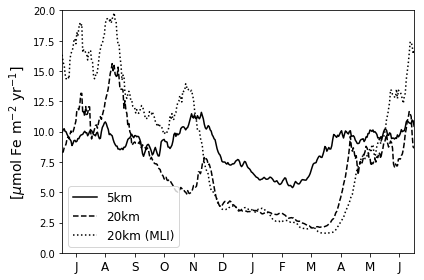

In [33]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)
ax.plot(range(360), (dfz_c_XLD+wpFep_c_XLD).roll(day=-180)*1e3*360*86400, 'k', label=r"5km")
ax.plot(range(360), (dfz_20+wpFep_20).roll(day=-180)*1e3*360*86400, 'k--', label=r"20km")
ax.plot(range(360), (dfz_20mli+wpFep_20mli).roll(day=-180)*1e3*360*86400, 'k:', label=r"20km (MLI)")
ax.set_ylim([0.,20])
ax.set_xlim([0,359])
ax.set_xticks(np.linspace(14,344,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax.legend(fontsize=12, loc='lower left')
ax.set_ylabel(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=14)
plt.savefig(op.join(pdir,'Figures/TotVertIronFlux_resolution-comp.pdf'))

In [22]:
# Fe.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Fe_c = Fe.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()
Fe_c

[########################################] | 100% Completed | 21.8s


<xarray.DataArray 'TRAC03' (time: 60, Z: 76)>
array([[6.291285e-06, 6.300007e-06, 6.309959e-06, ..., 3.984247e-04,
        3.990080e-04, 3.992028e-04],
       [8.309975e-06, 8.320199e-06, 8.331819e-06, ..., 3.984162e-04,
        3.990016e-04, 3.991974e-04],
       [1.045635e-05, 1.046768e-05, 1.048051e-05, ..., 3.984071e-04,
        3.989953e-04, 3.991935e-04],
       ...,
       [1.064281e-04, 1.064393e-04, 1.064521e-04, ..., 3.980413e-04,
        3.987599e-04, 3.990707e-04],
       [1.068283e-04, 1.068398e-04, 1.068530e-04, ..., 3.980168e-04,
        3.987393e-04, 3.990548e-04],
       [1.073321e-04, 1.073441e-04, 1.073578e-04, ..., 3.979965e-04,
        3.987231e-04, 3.990430e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...
    iter     (time) int64 4668480 4671360 

# Entrainment flux

## $$F_{ent} = \Delta c|_{ML} \Big(\frac{dh}{dt} + v\frac{dh}{dy}\Big)$$

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


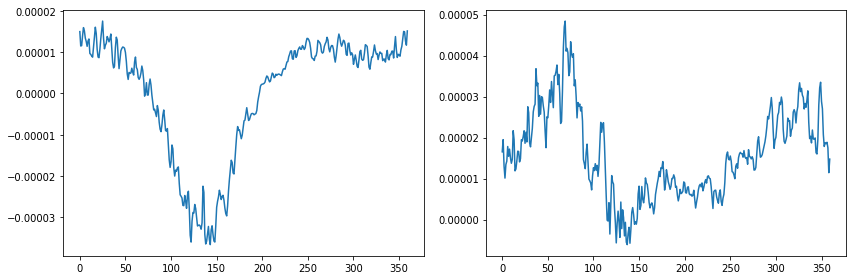

In [22]:
XLD_t = (-MXLD + MXLD.roll(day=-1).data) / 86400
XLD_t = .5*(XLD_t.roll(day=1).data + XLD_t)
XLD_y = (-MXLD + MXLD.roll(YC=-1).data)/(-MXLD.YC + MXLD.YC.roll(YC=-1).data)
XLD_y = .5*(XLD_y.roll(YC=1).data + XLD_y)

In [11]:
zm = xr.DataArray(np.abs(ds.Z).data[np.newaxis,:,np.newaxis]*np.ones((360,400))[:,np.newaxis,:],
                 dims=['day','Z','YC'])
nZMXLD = np.argmin(np.abs(zm-MXLD), axis=1)
nZXLD100 = nZMXLD.data.copy()
nZXLD100[nZXLD100<22] = 22
nZXLD100 = xr.DataArray(nZXLD100, dims=nZMXLD.dims, coords=nZMXLD.coords)

v = ds.VVEL
v_xb = grid.interp(v.mean('XC'),'Y',boundary='fill')
v_xb.coords['day'] = ('time',np.tile(range(360),dy))
v_xb = v_xb.groupby('day').mean('time')
vMLD = v_xb.isel(Z=(nZXLD100))
with ProgressBar():
    vXLD_y = (vMLD*XLD_y).compute()
vXLD_y

[########################################] | 100% Completed |  2min 56.3s


<xarray.DataArray (day: 360, YC: 400)>
array([[ 0.000000e+00,  1.174949e-06, -2.655853e-08, ...,  0.000000e+00,
        -0.000000e+00, -5.080804e-11],
       [ 0.000000e+00,  1.619861e-06, -2.435078e-08, ...,  0.000000e+00,
        -0.000000e+00, -4.694416e-11],
       [ 0.000000e+00,  1.428085e-06, -2.668759e-08, ...,  0.000000e+00,
        -0.000000e+00, -4.138309e-11],
       ...,
       [ 0.000000e+00,  1.076813e-06, -2.312802e-08, ...,  0.000000e+00,
         0.000000e+00, -4.372847e-11],
       [ 0.000000e+00,  1.179078e-06, -2.355277e-08, ...,  0.000000e+00,
         0.000000e+00, -5.420783e-11],
       [ 0.000000e+00,  1.284465e-06, -2.449181e-08, ...,  0.000000e+00,
         0.000000e+00, -4.643814e-11]])
Coordinates:
    Z        (day, YC) float64 -111.6 -1.611e+03 -1.611e+03 -1.544e+03 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


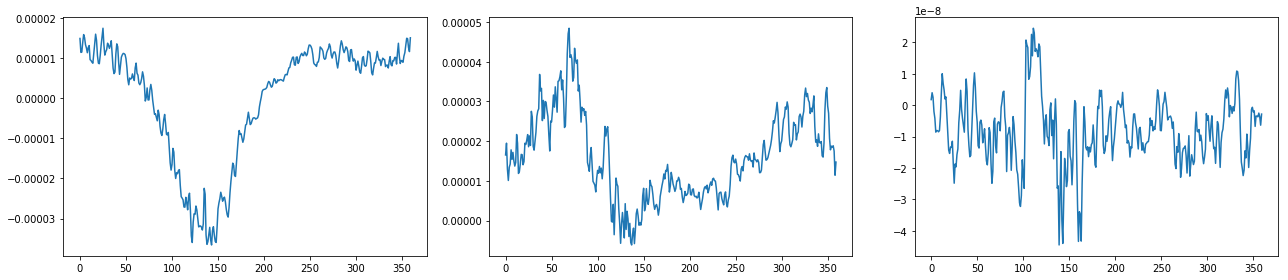

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
fig.set_tight_layout(True)
ax1.plot(range(360), XLD_t.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))
ax2.plot(range(360), XLD_y.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))
ax3.plot(range(360), vXLD_y.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))

In [18]:
with ProgressBar():
    Feday = Fe.groupby('day').mean(['time','XC']).compute()
Fe_t = Feday.isel(Z=(nZXLD100))
Fe_b = Feday.isel(Z=(nZXLD100+1))
dFetb = -Fe_t+Fe_b
dFetb

[########################################] | 100% Completed |  1min  9.6s


<xarray.DataArray 'TRAC03' (day: 360, YC: 400)>
array([[0.000000e+00, 3.646623e-06, 3.559893e-06, ..., 4.605827e-06,
        4.396832e-06, 4.412621e-06],
       [0.000000e+00, 3.650697e-06, 3.562949e-06, ..., 4.708359e-06,
        4.496047e-06, 4.463378e-06],
       [0.000000e+00, 3.654830e-06, 3.565365e-06, ..., 4.810179e-06,
        4.594272e-06, 4.520247e-06],
       ...,
       [0.000000e+00, 3.910798e-06, 3.804424e-06, ..., 4.364658e-06,
        4.217247e-06, 4.282265e-06],
       [0.000000e+00, 3.914785e-06, 3.809138e-06, ..., 4.435555e-06,
        4.270027e-06, 4.324989e-06],
       [0.000000e+00, 3.918598e-06, 3.813650e-06, ..., 4.518268e-06,
        4.341986e-06, 4.368732e-06]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

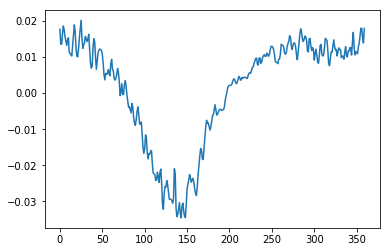

In [86]:
plt.plot(range(360), (dFetb*dXLDdt * 360*86400).roll(day=-180))

In [24]:
n500 = 40
diff_M = dfz_c[:,:n500].max()
diff_M

<xarray.DataArray ()>
array(4.106906e-09)

In [26]:
wpbp = xr.open_dataset(op.join(pdir,'APEconversion_05km.nc')).wpbp
wpbp.coords['days'] = ('time', np.tile(range(24),23))
with ProgressBar():
    wpbp_d = wpbp.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
wpbp_d

<xarray.DataArray 'wpbp' (days: 24, Zl: 76)>
array([[-7.187066e-09,  1.332598e-10,  3.231533e-10, ...,  1.130260e-09,
         3.394472e-10,  7.082715e-11],
       [-1.544291e-08,  1.299605e-10,  3.189735e-10, ...,  1.188880e-09,
         3.307010e-10,  6.157563e-11],
       [-1.069393e-08,  1.325497e-10,  3.251550e-10, ...,  1.065574e-09,
         3.010058e-10,  6.190637e-11],
       ...,
       [ 7.180843e-09,  2.704006e-10,  6.088511e-10, ...,  9.565284e-10,
         2.700874e-10,  5.531997e-11],
       [ 1.512411e-09,  2.137826e-10,  4.909713e-10, ...,  1.150734e-09,
         3.369943e-10,  6.554798e-11],
       [-7.243536e-09,  1.746427e-10,  4.073412e-10, ...,  1.023142e-09,
         2.853009e-10,  5.833577e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [35]:
wpbp.Zl[:n500]

<xarray.DataArray 'Zl' (Zl: 40)>
array([   0.  ,   -1.  ,   -2.14,   -3.44,   -4.93,   -6.63,   -8.56,  -10.76,
        -13.26,  -16.1 ,  -19.31,  -22.94,  -27.04,  -31.65,  -36.83,  -42.62,
        -49.09,  -56.29,  -64.27,  -73.1 ,  -82.83,  -93.52, -105.22, -117.98,
       -131.85, -146.88, -163.1 , -180.55, -199.25, -219.22, -240.49, -263.05,
       -286.92, -312.09, -338.55, -366.29, -395.29, -425.53, -456.98, -489.63],
      dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


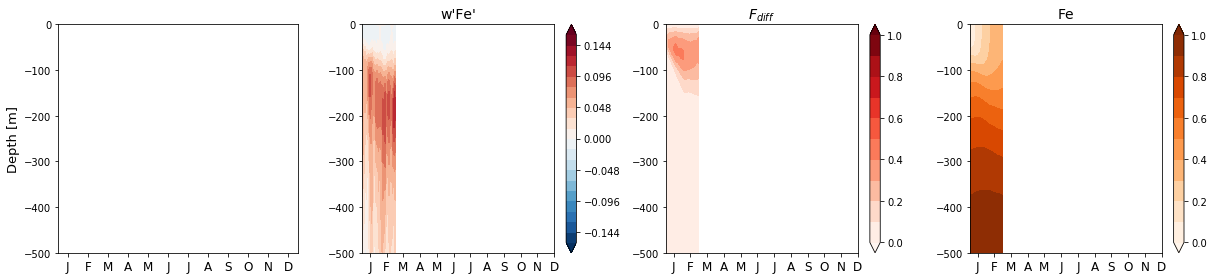

In [27]:
nys, nyn = (6e5,14e5)
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(17,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(np.linspace(0,345,24), wpbp_d.Zl, wpbp_d.T.roll(days=-12)/wpbp_d[:,:n500].max(), 
#                   levels=np.linspace(0.,1.,11), extend='both', cmap='magma')
im2 = ax2.contourf(range(60), wpFep_d.Zl, (wpFep_d.mean('YC')/diff_M).T, 
                  levels=np.linspace(-.16,.16,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(60), dfz_c.Zl, (dfz_c.mean('YC')/diff_M).T, 
                  levels=np.linspace(0.,1.,11), cmap='Reds', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
im4 = ax4.contourf(range(60), Fe_c.Z, Fe_c.T/Fe_c[:,:n500].max(), 
                  levels=np.linspace(0,1,11), extend='both', cmap='Oranges')
# ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
# ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
# ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
# ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax1.set_xlim([0.,359.])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax4.set_ylim([-5e2,0])
# ax1.set_title(r"w'b'", fontsize=14)
ax2.set_title(r"w'Fe'", fontsize=14)
ax3.set_title(r"$F_{diff}$", fontsize=14)
ax4.set_title(r"Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),0), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),0), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),0), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),0), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
# cbar.set_label(r"$F_z/F_{diff}^{max}$", fontsize=12)
# plt.savefig(op.join(pdir,'Figures/wb-IronFlux-P_dailyclimatology_05km.pdf'))

In [34]:
b = grid.diff(ds.PHIHYD,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
bk = xrft.dft(b.chunk(chunks={'XC':200}), dim=['XC'], shift=False)
bx = xr.DataArray(dsar.fft.ifft2(2j*np.pi*(bk*bk.freq_XC).data, axes=(-2,-1)).real,
                 dims=b.dims, coords=b.coords)
M2 = np.sqrt(bx**2 + grid.interp(grid.diff(b,'Y',boundary='fill')
                                / grid.diff(b.YC,'Y',boundary='fill'),
                                'Y',boundary='fill')**2,
            )
dbdz = grid.diff(b,'Z',boundary='fill')/grid.diff(ds.Zl,'Z',boundary='fill')
dFedz = grid.diff(Fe,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
dbdz.coords['days'] = ('time',np.tile(range(360),dy))
dFedz.coords['days'] = ('time',np.tile(range(360),dy))
M2.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    dbdz_d = dbdz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    dFedz_d = dFedz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    M2_d = M2.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
dFedz_d

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 10min 19.6s
[########################################] | 100% Completed |  1min  4.1s
[########################################] | 100% Completed | 14min 55.6s


<xarray.DataArray (days: 360, Zl: 76)>
array([[-8.806712e-06,  1.909307e-10,  1.868772e-10, ..., -3.256370e-08,
        -2.867481e-08, -8.664207e-09],
       [-8.913789e-06,  1.918862e-10,  1.878993e-10, ..., -3.257090e-08,
        -2.867738e-08, -8.700470e-09],
       [-9.026429e-06,  1.994580e-10,  1.962678e-10, ..., -3.257691e-08,
        -2.868179e-08, -8.737817e-09],
       ...,
       [-8.478466e-06,  1.617309e-10,  1.552301e-10, ..., -3.314693e-08,
        -2.868254e-08, -8.044089e-09],
       [-8.575546e-06,  1.640686e-10,  1.579092e-10, ..., -3.315003e-08,
        -2.869361e-08, -8.084397e-09],
       [-8.679102e-06,  1.686695e-10,  1.627515e-10, ..., -3.315494e-08,
        -2.870166e-08, -8.124577e-09]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [35]:
with ProgressBar():
    Ptot_midd = (P1day + P2day).sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


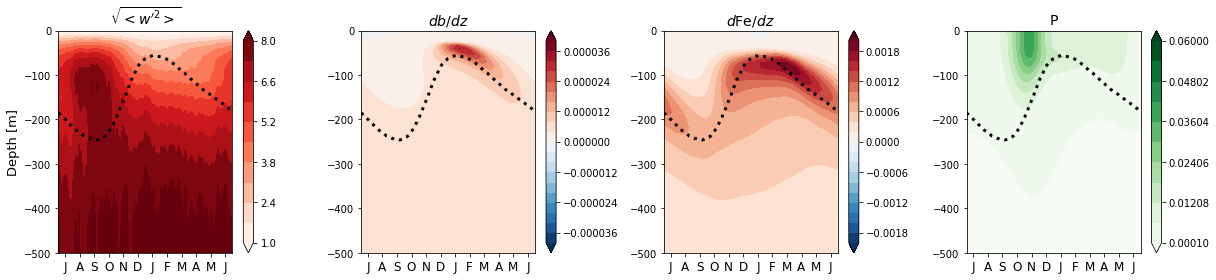

In [36]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(17,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
                  levels=np.linspace(1,8.,11), cmap='Reds', extend='both')
im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
                  levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dFedz_d.Zl, -dFedz_d.T.roll(days=-180)*1e3, 
                  levels=np.linspace(-.002,.002,21), cmap='RdBu_r', extend='both')
im4 = ax4.contourf(range(360), Ptot_midd.Z, Ptot_midd.T.roll(days=-180), 
                  levels=np.linspace(1e-4,6e-2,11), cmap='Greens', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax4.set_ylim([-5e2,0])
ax2.set_xlim([0,359])
ax2.set_title(r"$db/dz$", fontsize=14)
ax4.set_title(r"P", fontsize=14)
ax3.set_title(r"$d$Fe$/dz$", fontsize=14)
ax1.set_title(r"$\sqrt{<w'^2>}$", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)
# cbar.set_label(r"$F_z/F_{diff}^{max}$", fontsize=12)
plt.savefig(op.join(pdir,'Figures/w2-Bz-Fez-P_dailyclimatology_05km.pdf'))

In [53]:
with ProgressBar():
    TpFep_clim = TpFep.mean(['time','XC']).compute()

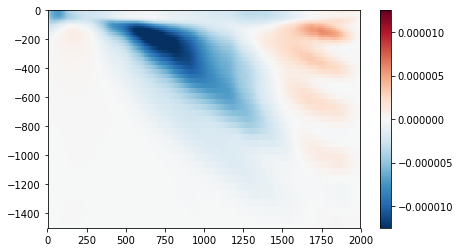

In [55]:
fig, ax = plt.subplots(figsize=(7,4))
im = ax.pcolormesh(TpFep.YC*1e-3, TpFep.Z, TpFep_clim,
                  cmap='RdBu_r', vmin=-1.25e-5, vmax=1.25e-5)
ax.set_ylim([-1500,0.])
fig.colorbar(im, ax=ax)

In [23]:
print(dFetb.dims, XLD_t.dims, vXLD_y.dims)

('day', 'YC') ('day', 'YC') ('day', 'YC')


In [24]:
with ProgressBar():
    Fent = (dFetb*(XLD_t + vXLD_y)).sel(YC=slice(6e5,14e5)).mean('YC').compute()
Fent

<xarray.DataArray (day: 360)>
array([-9.959122e-11, -9.372963e-11, -6.908899e-11, ..., -1.602841e-10,
       -1.434317e-10, -1.205979e-10])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


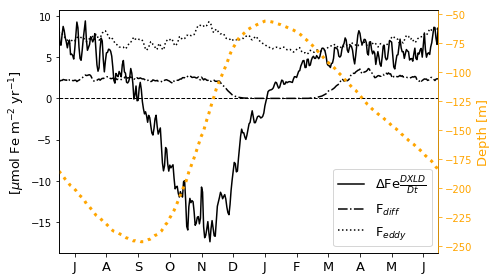

In [25]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax.plot(range(360), Fent.roll(day=-180) * 1e3*360*86400, 'k', label=r"$\Delta$Fe$\frac{DXLD}{Dt}$")
ax.plot(range(360), dfz_c_XLD.roll(day=-180) * 1e3*360*86400, 'k-.', label=r"F$_{diff}$")
ax.plot(range(360), wpFep_c_XLD.roll(day=-180) * 1e3*360*86400, 'k:', label=r"F$_{eddy}$")
ax.plot(range(360), np.zeros(360), 'k--', lw=1)
ax.set_ylabel(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=13)
ax.set_xlim([0,359])
ax.legend(loc='lower right', fontsize=13)
ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
im, = ax2.plot(range(360), -MXLD.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.spines["right"].set_edgecolor(im.get_color())
ax2.tick_params(axis='y', colors=im.get_color())
ax2.set_ylabel(r"Depth [m]", fontsize=13, color='orange')
plt.savefig(op.join(pdir,'Figures/VertFlux_wEntrainment.pdf'))

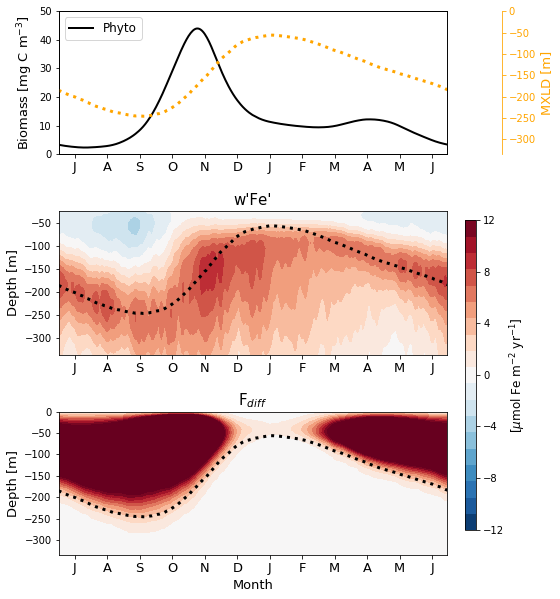

In [47]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3,ax9) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
# fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
im3 = ax3.contourf(range(360), wpFep_d.Zl, wpFep_d.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), dfz_c.Zl, dfz_c.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r', extend='both')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
               ls=':', lw=3, color='orange')


ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax3.set_ylim([-335,-25])
ax5.set_ylim([-335,0])
ax9.set_ylim([-335,0])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

ax5.spines["right"].set_edgecolor(im5.get_color())
ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-12,-8,-4,0,4,8,12])
cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
ax9.set_title(r'F$_{diff}$', fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe'", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_woutflux_wHopfMellor_05km.pdf'))

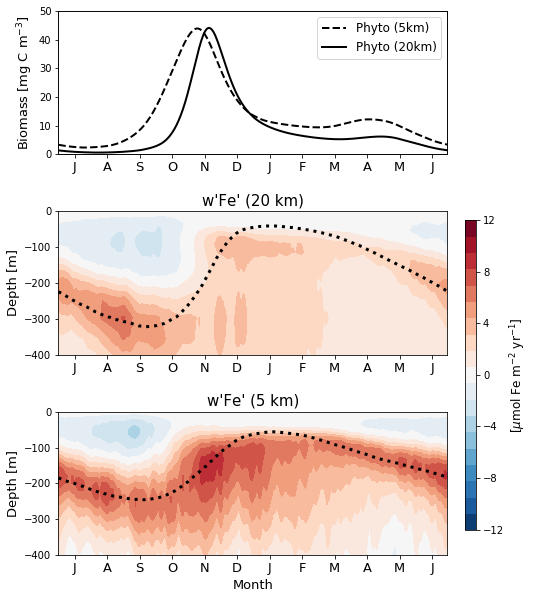

In [51]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])
PtotC20 = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20km.nc')).P_biomass
wpFep_20 = xr.open_dataset(op.join(bdir,'wpFep_600-1400km_20km.nc')).wpFep
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20 = hbl99.groupby('day').mean(['time'])

fig, (ax1,ax3,ax9) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
# fig.set_tight_layout(True)
ax2 = ax1.twinx()
# ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
# ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k--', lw=2, label=r'Phyto (5km)')
ax1.plot(range(360), PtotC20.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto (20km)')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
im3 = ax3.contourf(range(360), wpFep_20.Zl, wpFep_20.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), wpFep_d.Zl, wpFep_d.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
ax3.plot(range(360), -MXLD20.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#                ls=':', lw=3, color='orange')


ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
# ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
# ax5.tick_params('y', colors='orange')
ax3.set_ylim([-400,0])
# ax5.set_ylim([-400,0])
ax9.set_ylim([-400,0])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper right', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

ax5.spines["right"].set_edgecolor(im5.get_color())
ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-12,-8,-4,0,4,8,12])
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
ax9.set_title(r"w'Fe' (5 km)", fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe' (20 km)", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_wHopfMellor_20-05km.pdf'))

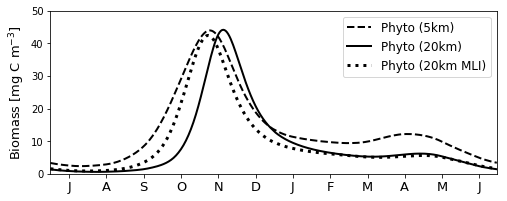

In [59]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])
PtotC20 = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20km.nc')).P_biomass
PtotC20mli = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20kmMLI.nc')).P_biomass
wpFep_20mli = xr.open_dataset(op.join(bdir,'wpFep_600-1400km_20kmMLI.nc')).wMLIFep
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20 = hbl99.groupby('day').mean(['time'])
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20kmMLI.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20mli = hbl99.groupby('day').mean(['time'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
# fig.set_tight_layout(True)
# ax2 = ax1.twinx()
# ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
# ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k--', lw=2, label=r'Phyto (5km)')
ax.plot(range(360), PtotC20.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k', lw=2, label=r'Phyto (20km)')
ax.plot(range(360), PtotC20mli.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k:', lw=3, label=r'Phyto (20km MLI)')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,50.])
ax.set_xlim([0.,359])
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_5-20-20MLIkm.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


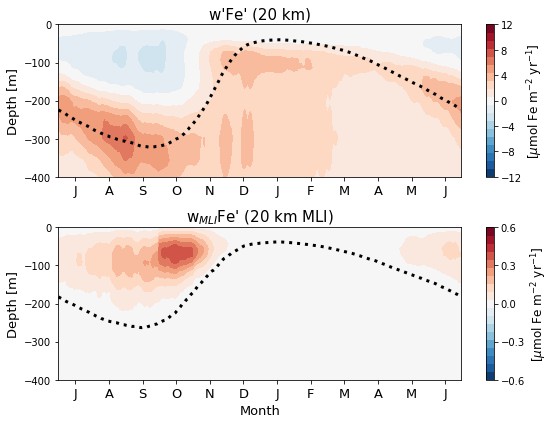

In [57]:
fig, (ax3,ax9) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.set_tight_layout(True)
im3 = ax3.contourf(range(360), wpFep_20.Zl, wpFep_20.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), wpFep_20mli.Zl, wpFep_20mli.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-.6,.6,20), cmap='RdBu_r')
ax3.plot(range(360), -MXLD20.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD20mli.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#                ls=':', lw=3, color='orange')


ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
# ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
# ax5.tick_params('y', colors='orange')
ax3.set_ylim([-400,0])
# ax5.set_ylim([-400,0])
ax9.set_ylim([-400,0])
# ax1.set_title(r"Biomass", fontsize=15)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

# ax5.spines["right"].set_edgecolor(im5.get_color())
# ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
# cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-12,-8,-4,0,4,8,12])
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar9 = fig.colorbar(im9, ax=ax9, ticks=[-.6,-.3,0,.3,.6])
cbar9.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
ax9.set_title(r"w$_{MLI}$Fe' (20 km MLI)", fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe' (20 km)", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/wFe_HopfMellor_20-20MLIkm.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


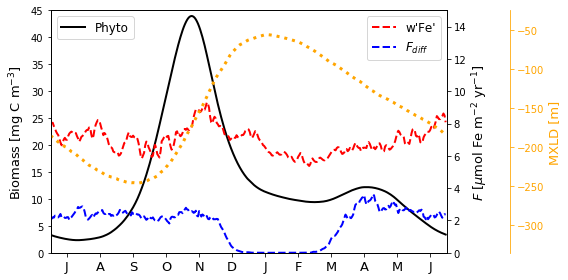

In [37]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
ax2.set_ylim([0,1.5e1])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_Fadv-Fdiff_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


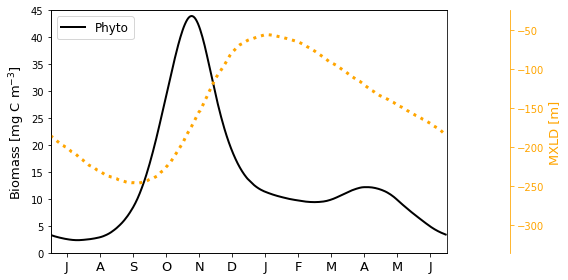

In [38]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
# ax2.plot(range(360), adz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax2.plot(range(360), dfz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
# ax2.set_ylim([0,15e-8])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
# ax2.set_ylabel('$F|_{z=100m}$ [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', fontsize=13)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


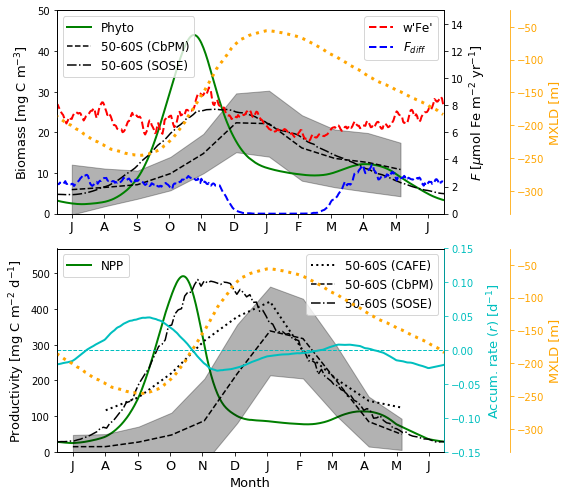

In [35]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.17))
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'Phyto')
ax1.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax1.fill_between(np.linspace(15,350,12), 
                ((c_ker_mon-c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((c_ker_mon+c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
# ax1.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax1.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
        (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0,1.5e1])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)


ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
        label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax7.fill_between(np.linspace(15,350,12), 
                ((cbpm_ker_mon-cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((cbpm_ker_mon+cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
        (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')
# ax7.plot(range(360), (adz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax7.plot(range(360), (dfz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='c')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='c')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
ax7.legend(loc='upper right', fontsize=12)
ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='c', fontsize=13)
ax4.tick_params('y', colors='c')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax6.tick_params('y', colors='orange')
ax6.set_ylim([-335,-25])
# ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'Productivity [mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWithObs_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


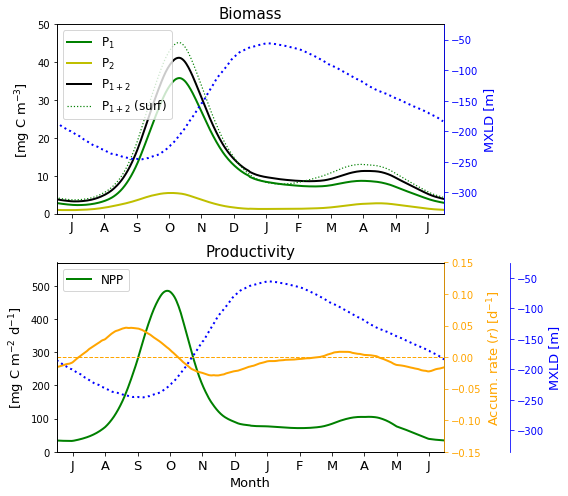

In [139]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'P$_1$')
ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), Ptot.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'P$_{1+2}$')
ax1.plot(range(360), 
         (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
        'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

# ax2.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
#         (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0.,50.])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax5.tick_params('y', colors='b')
ax5.set_ylim([-335,-25])
ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'[mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)


# ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
# ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
#         label=r'50-60S (CbPM)', ls='--', color='k')
# ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
#         (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='orange')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='orange')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
# ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax7.legend(loc='upper right', fontsize=12)
# ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='orange', fontsize=13)
ax4.tick_params('y', colors='orange')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax6.tick_params('y', colors='b')
ax6.set_ylim([-335,-25])
ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWoutObs_05km.pdf'))

In [140]:
Ptot.mean(['YC','XC']).sum('days').values

array(4880.81201172)

In [164]:
with ProgressBar():
    Pk = xrft.power_spectrum((P1+P2)[:,0], dim=['XC'], detrend='constant').compute()
Pk

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 18min 45.6s


<xarray.DataArray 'rechunk-merge-bf19041fe8f0dffc238dbb7f72313aa1' (time: 2880, YC: 400, freq_XC: 200)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.064087e-03, 1.127113e-02, ..., 1.436970e-02, 1.127113e-02],
        ...,
        [7.175154e-08, 5.072869e-08, ..., 8.083806e-08, 5.072869e-08],
        [1.260117e-11, 3.204792e-10, ..., 1.653858e-10, 3.204792e-10]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.208002e-03, 2.437720e-02, ..., 2.057309e-02, 2.437720e-02],
        ...,
        [1.777752e-08, 1.538573e-08, ..., 1.026699e-07, 1.538573e-08],
        [7.163399e-09, 1.322208e-08, ..., 6.666881e-09, 1.322208e-08]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [2.324692e-02, 3.387001e-02, ..., 6.957381e-02, 3.387001e-02],
        ...,
        [1.479316e-07, 7.573741e-08, ..., 9.987572e-09, 7.573741e-08],
        [3.099984e-10, 1.502451e-09, ..., 2.305467e-10, 1.5

In [165]:
Pk.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
with ProgressBar():
    Pk_seas = Pk.sel(YC=slice(6e5,14e5)).groupby('seas').mean(['time','YC']).compute()
Pk_seas

<xarray.DataArray 'rechunk-merge-bf19041fe8f0dffc238dbb7f72313aa1' (seas: 4, freq_XC: 200)>
array([[2.939913e-07, 2.894309e-07, 2.931618e-07, ..., 2.969983e-07,
        2.931618e-07, 2.894309e-07],
       [3.295178e-07, 3.320025e-07, 3.282937e-07, ..., 3.371609e-07,
        3.282937e-07, 3.320025e-07],
       [5.221196e-06, 5.219976e-06, 5.285022e-06, ..., 5.361496e-06,
        5.285022e-06, 5.219976e-06],
       [3.839027e-06, 3.829936e-06, 3.885358e-06, ..., 3.930679e-06,
        3.885358e-06, 3.829936e-06]])
Coordinates:
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06
  * seas             (seas) int64 0 1 2 3

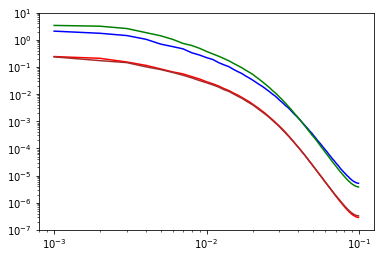

In [169]:
fig, ax = plt.subplots()
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[0,101:], 'r')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[1,101:], 'brown')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[2,101:], 'b')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[3,101:], 'g')
ax.set_ylim([1e-7,1e1])
ax.set_xscale('log')
ax.set_yscale('log')

# Eddy iron fluxes

In [27]:
diff = ds.DFrITr03
with ProgressBar():
    diff_mn = (diff*ds.rA**-1*(360*86400)*1e3).mean(['time','XC']).compute()
diff_mn

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  8min 17.0s


<xarray.DataArray (Zl: 76, YC: 400)>
array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  3.594931e+00,  3.959533e+00, ..., -2.580548e-05,
         1.880293e-06, -4.707909e-07],
       [ 0.000000e+00,  7.720799e+00,  8.493536e+00, ...,  1.494757e-04,
         2.709226e-05, -3.726798e-07],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  7.112975e-19,  1.218178e-16, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00]])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...

In [40]:
# with ProgressBar():
#     ds_clim = ds.mean(['time','XC','XG']).load()
#     ds1_clim = ds1.mean(['time','XC','XG']).load()

In [9]:
with ProgressBar():
    T_clim = ds.THETA.sel(YC=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
    vb = ds.VVEL.sel(YG=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
    wb = ds.WVEL.sel(YC=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
    Feb = ds.TRAC03.sel(YC=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
    vFeb = ds.VTRAC03.sel(YG=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
    wFeb = ds.WTRAC03.sel(YC=slice(5.9e5,14.1e5)).mean(['time','XC']).load()
#     FadvV = ds.ADVyTr03[:].mean(['time','XC']).load()
#     FadvW = ds.ADVrTr03[:].mean(['time','XC']).load()
#     kppb = ds.KPPgTr03[:].mean(['time','XC']).load()
#     dfib = ds.DFrITr03[:].mean(['time','XC']).load()
#     bgcb = ds.FeTbgc[:].mean(['time','XC']).load()

[#######                                 ] | 18% Completed | 15.2s


KeyboardInterrupt: 

In [42]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (Z: 76, YC: 400)>
array([[ 0.000000e+00,  6.925483e-08,  1.391723e-07, ..., -7.192949e-08,
        -3.113576e-08, -3.934717e-09],
       [ 0.000000e+00,  6.706054e-08,  1.359050e-07, ..., -6.891339e-08,
        -3.000892e-08, -3.967481e-09],
       [ 0.000000e+00,  6.506914e-08,  1.329375e-07, ..., -6.482641e-08,
        -2.889035e-08, -4.310001e-09],
       ...,
       [ 0.000000e+00,  2.240300e-11,  8.027101e-11, ...,  9.235587e-10,
         2.128626e-10,  1.846261e-11],
       [ 0.000000e+00,  5.303406e-11,  2.218947e-10, ...,  1.083888e-09,
         2.363005e-10,  1.564954e-11],
       [ 0.000000e+00, -6.580403e-11,  5.420464e-11, ...,  6.625047e-10,
         4.044409e-11,  5.903181e-12]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) 

In [43]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * ds.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (Z: 76, YC: 400)>
dask.array<shape=(76, 400), dtype=float32, chunksize=(76, 399)>
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...

In [44]:
MLDb = xr.open_dataset(op.join(pdir,'KPPMLD_05km.nc')).mld.mean(['time','XC'])
MXLDb = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_05km.nc')).hbl99.mean(['time'])

In [45]:
Fe = ds.TRAC03
with ProgressBar():
    dFedz = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')/grid.diff(Fe.Z,'Z',boundary='fill')).compute()

[########################################] | 100% Completed | 11min  5.9s


In [46]:
with ProgressBar():
    dFe = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')).mean('time').compute()
# nFez_clim = np.argmax(-dFedz[:,:],axis=1)

[########################################] | 100% Completed | 51.8s


In [47]:
nFez_clim = np.argmax(-dFedz.mean('time')[1:], axis=0)
# nFez_clim+9

N = nFez_clim.shape
zFe_clim = np.zeros(nFez_clim.shape)
dFe_at_zFe = np.zeros(nFez_clim.shape)
for i in range(N[0]):
    zFe_clim[i] = ds.Zl[int(nFez_clim[i]+1)]
    dFe_at_zFe[i] = dFe[:,i][int(nFez_clim[i]+1)]
#     print(dFe[:,i][int(nFez_clim[i]+1)].values)
#     for j in range(N[1]):
#         zFe_clim[i,j] = ds.Zl[int(nFez_clim[i,j])]
        
zFe_clim = xr.DataArray(zFe_clim, dims=nFez_clim.dims, coords=nFez_clim.coords)
dFe_at_zFe = xr.DataArray(dFe_at_zFe, dims=nFez_clim.dims, coords=nFez_clim.coords)
print(dFe_at_zFe, zFe_clim)

<xarray.DataArray (YC: 400)>
array([0.000000e+00, 2.221400e-05, 3.441313e-06, ..., 1.852701e-05,
       1.861934e-05, 1.910226e-05])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ... <xarray.DataArray (YC: 400)>
array([-1.00000e+00, -1.51151e+03, -7.31000e+01, ..., -4.90900e+01,
       -4.90900e+01, -4.90900e+01])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...


In [48]:
diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA*ds.drF)
with ProgressBar():
    dff_z_clim = diff_z[:].mean(['time','XC']).compute()

[########################################] | 100% Completed |  5min 45.5s


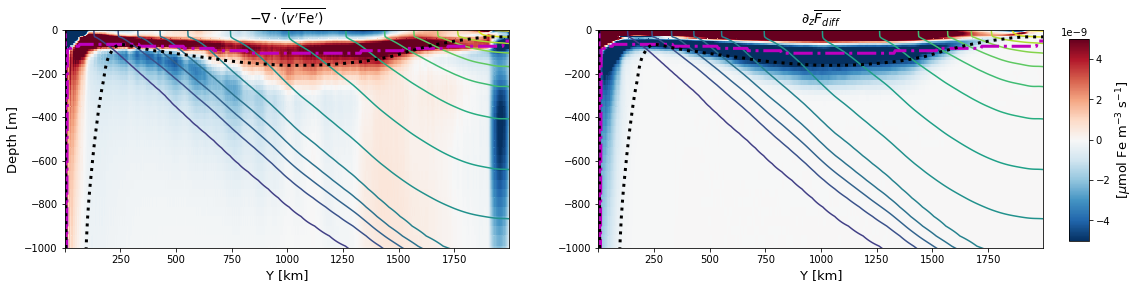

In [49]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yst = 10
dny = 20
dnz = 3
yy, zz = np.meshgrid(ds.YC.data[yst::dny], ds.Z.data[::dnz])
N = wpFep_b.data[::dnz,yst::dny].shape
T_clim = xr.open_dataset(op.join(pdir,'Climatological-theta_05km.nc')).THETA_clim

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(T_clim.YC, T_clim.Z, advpp_b*1e3, 
                   vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
                   rasterized=True)
# ax1.plot(MLDb.YC, -MLDb, 'k', lw=2)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax1.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax1.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
ax1.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
#            , cmap='RdBu_r')
# ax1.quiver(yy, zz, (vpFep_b/Feb)[::dnz,yst::dny], 
#           np.ones((N[0],N[1]))*(wpFep_b/Feb)[::dnz,yst::dny], 
#           pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax1.set_xticks(np.arange(0.,2e6,2.5e5))
ax1.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax1.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_ylim([-1000,0.])
ax1.set_title(r"$-\nabla\cdot\overline{(v'{\tt Fe'})}$", fontsize=14)

ax2.pcolormesh(T_clim.YC, T_clim.Z, dff_z_clim*1e3, 
              vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
              rasterized=True)
# ax2.plot(MLDb.YC, -MLDb, 'k', lw=2)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax2.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax2.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
ax2.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
ax2.set_xticks(np.arange(0.,2e6,2.5e5))
ax2.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax2.set_xlabel('Y [km]', fontsize=13)
# ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_ylim([-1000,0.])
ax2.set_title(r"$\partial_z \overline{F_{diff}}$", fontsize=14)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-3}$ s$^{-1}$]", fontsize=13)
plt.savefig(op.join(pdir,'Figures/eddyfluxvector_05km-top1000m.pdf'))

# Iron budget

In [10]:
# month = np.tile(np.repeat(range(12),30),dy)
ds['month'] = ('time', np.repeat(range(2),30))
ds_mon = ds.groupby('month').mean(['time','XC','XG'])
ds_anom = ds.groupby('month') - ds_mon

In [45]:
with ProgressBar():
    Fem = ds_mon.TRAC03.sel(YC=slice(5.9e5,14.1e5)).load()
    vFem = ds_mon.VTRAC03.sel(YG=slice(5.9e5,14.1e5)).load()
    wFem = ds_mon.WTRAC03.sel(YC=slice(5.9e5,14.1e5)).load()
    advVm = ds_mon.ADVyTr03.sel(YG=slice(5.9e5,14.1e5)).load()
    advWm = ds_mon.ADVrTr03.sel(YC=slice(5.9e5,14.1e5)).load()
#     kppm = ds_mon.KPPgTr03.load()
    dfim = ds_mon.DFrITr03.sel(YC=slice(5.9e5,14.1e5)).load()
    bgcm = ds_mon.FeTbgc.sel(YC=slice(5.9e5,14.1e5)).load()

[########################################] | 100% Completed | 41.9s
[########################################] | 100% Completed | 43.6s
[########################################] | 100% Completed | 41.9s
[########################################] | 100% Completed | 42.7s
[########################################] | 100% Completed | 41.5s


In [46]:
advzm = grid.diff(advWm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advym = grid.diff(advVm, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advm = -(-advzm + advym).compute()

difz = grid.diff(dfim, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
# kpp = grid.diff(kppm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
ss = bgcm

advm

<xarray.DataArray (month: 2, Z: 76, YC: 820)>
array([[[ 3.668859e-12,  5.112719e-12, ..., -5.439175e-12, -5.541713e-12],
        [ 3.390437e-12,  4.723276e-12, ..., -5.430836e-12, -5.520136e-12],
        ...,
        [-1.793218e-13, -1.569199e-13, ...,  3.239683e-14,  5.218048e-14],
        [-1.672178e-13, -1.430366e-13, ...,  4.980044e-14,  7.694886e-14]],

       [[ 1.261499e-11,  1.282558e-11, ..., -8.522546e-12, -8.489495e-12],
        [ 1.245408e-11,  1.270551e-11, ..., -1.125468e-11, -1.121204e-11],
        ...,
        [-5.375048e-13, -5.498024e-13, ...,  4.419277e-13,  4.309166e-13],
        [-5.056571e-13, -5.164072e-13, ...,  4.517411e-13,  4.260307e-13]]],
      dtype=float32)
Coordinates:
  * YC       (YC) float64 5.905e+05 5.915e+05 5.925e+05 5.935e+05 5.945e+05 ...
  * month    (month) int64 0 1
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.90

In [54]:
ds15D.TRAC03[::2]

<xarray.DataArray 'TRAC03' (time: 3, Z: 76, YC: 2000, XC: 1000)>
dask.array<shape=(3, 76, 2000, 1000), dtype=float32, chunksize=(1, 76, 2000, 1000)>
Coordinates:
  * XC       (XC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * YC       (YC) >f4 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 6500.0 7500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    rA       (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    Depth    (YC, XC) >f4 dask.array<shape=(2000, 1000), chunksize=(2000, 1000)>
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(76, 2000, 1000), chunksize=(76, 2000, 1000)>
    iter     (time) int64 dask.array<shape=(3,), chunksize=(1,)>
  * time     (time) float64 1.4e+08 1.426e+08 1.452e+08
Attributes:
    standard_name:  TRAC03
    long_name:      FeT concentration
    units:          mM/m^

In [59]:
fe_xbar = ds15D.TRAC03[::2].sel(YC=slice(5.9e5,14.1e5)).mean('XC')
print(ds15D.TRAC03.attrs)
tempo = (-fe_xbar+fe_xbar.shift(time=-1).data)[:-1] / (3e1*864e2)
# tempo = fe_xbar.diff('time') / (3e1*864e2)
tempo.coords['month'] = ('time',range(2))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)

dFe = tempo.groupby('month').mean(['time']).compute()
# dFe = tempo
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

OrderedDict([('standard_name', 'TRAC03'), ('long_name', 'FeT concentration'), ('units', 'mM/m^3')])


<xarray.DataArray (month: 2, Z: 76, YC: 820)>
array([[[ 2.621220e-11,  2.624680e-11, ...,  1.433141e-11,  1.428257e-11],
        [ 2.621438e-11,  2.624879e-11, ...,  1.433644e-11,  1.428755e-11],
        ...,
        [-1.369295e-13, -1.147423e-13, ...,  6.091369e-14,  8.063064e-14],
        [-1.268240e-13, -1.002128e-13, ...,  8.987155e-14,  1.195929e-13]],

       [[ 1.819860e-11,  1.821956e-11, ...,  1.066374e-11,  1.059622e-11],
        [ 1.819900e-11,  1.822006e-11, ...,  1.066433e-11,  1.059686e-11],
        ...,
        [-5.063078e-13, -5.186028e-13, ...,  4.687378e-13,  4.577902e-13],
        [-5.056566e-13, -5.175249e-13, ...,  5.292249e-13,  5.009856e-13]]],
      dtype=float32)
Coordinates:
  * YC       (YC) >f4 590500.0 591500.0 592500.0 593500.0 594500.0 595500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7

In [60]:
res = (dFe - (advm + difz + ss)).compute()
res

<xarray.DataArray (month: 2, Z: 76, YC: 820)>
array([[[-4.023795e-13, -4.030127e-13, ..., -1.580177e-13, -1.442292e-13],
        [-4.805184e-16, -6.505213e-16, ..., -5.282233e-16, -4.050579e-16],
        ...,
        [ 1.293724e-16, -6.606857e-17, ...,  3.840786e-17,  1.034058e-17],
        [-1.563302e-14, -1.327917e-14, ...,  4.593466e-15,  7.186702e-15]],

       [[-4.983028e-13, -4.543657e-13, ..., -2.980889e-12, -2.967388e-12],
        [-5.707240e-16, -5.863365e-16, ..., -1.128438e-15, -4.007211e-16],
        ...,
        [-2.938188e-17, -5.209591e-17, ..., -7.345470e-17,  1.149254e-17],
        [-4.729751e-14, -4.835596e-14, ...,  4.248826e-14,  3.997665e-14]]],
      dtype=float32)
Coordinates:
  * YC       (YC) >f4 590500.0 591500.0 592500.0 593500.0 594500.0 595500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7

In [61]:
nys,nyn = (600,1400)
adv_mean = advm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advym.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
# kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

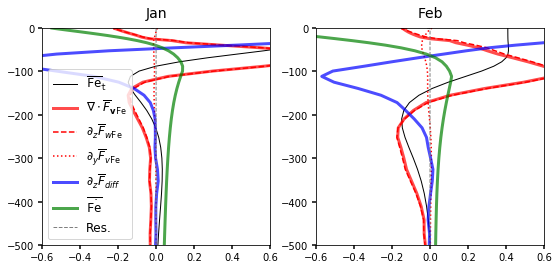

In [64]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9,4))
for j in range(2):
    axes[j].plot(dFe_mean[j]*1e3*(360*86400), dFe_mean.Z, 'k',
                       lw=1, alpha=1., label=r'$\overline{\tt Fe}_t$')
    axes[j].plot(adv_mean[j]*1e3*(360*86400), adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} {\tt Fe}}$')
    axes[j].plot(advz_mean[j]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls='--', label=r'$\partial_z \overline{F}_{w {\tt Fe}}$')
    axes[j].plot(-advy_mean[j]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls=':', label=r'$\partial_y \overline{F}_{v {\tt Fe}}$')
    axes[j].plot(dif_mean[j]*1e3*(360*86400), dif_mean.Z, 'b',
                       lw=3, alpha=.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3*(360*86400), kpp_mean.Z, 'orange',
#                        lw=1, label=r"$\partial_z \overline{F}_{KPP}$")
    axes[j].plot(dot_mean[j]*1e3*(360*86400), dot_mean.Z, 'g',
                   lw=3, alpha=.7, label=r"$\overline{\dot{\tt Fe}}$")
    axes[j].plot(res_mean[j]*1e3*(360*86400), res_mean.Z, '--', color='grey',
                       lw=1, alpha=1., label=r"Res.")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

    tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
    axes[j].tick_params(axis='both', **tkw)
        
    axes[j].set_title(months[j],fontsize=14,y=1.02)
    axes[j].set_xlim([-6e-1,6e-1])
    axes[j].set_ylim([-5e2,0.])
#         axes[j,i].grid(True)
axes[0].legend(loc='lower left', fontsize=12)
# fig.subplots_adjust(left=0.12)
# # cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# # cbar = fig.colorbar(cax, cax=cbar_ax)
# # cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

# fig.text(0.01, 0.5, 'Depth [m]', 
#          va='center', rotation='vertical', fontsize=14)
# fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
#          va='center', rotation='horizontal', fontsize=14)

# plt.tight_layout(pad=2.5)
# # plt.grid(True)
# plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_05km.pdf'))

7
8
9
10
11
0


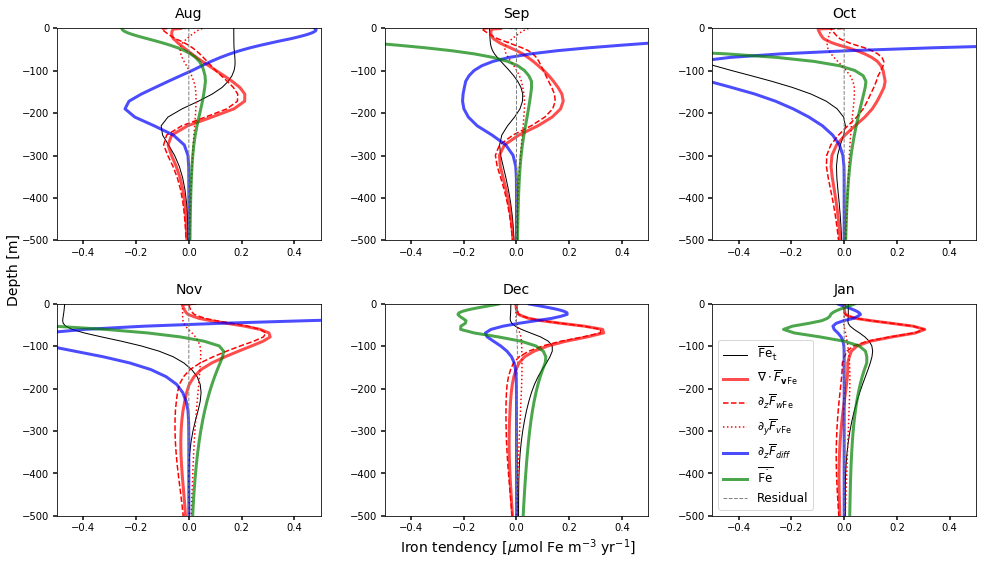

In [28]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                       lw=1, alpha=1., label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(adv_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} {\tt Fe}}$')
        axes[j,i].plot(advz_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls='--', label=r'$\partial_z \overline{F}_{w {\tt Fe}}$')
        axes[j,i].plot(-advy_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls=':', label=r'$\partial_y \overline{F}_{v {\tt Fe}}$')
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                       lw=3, alpha=.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3*(360*86400), kpp_mean.Z, 'orange',
#                        lw=1, label=r"$\partial_z \overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                       lw=3, alpha=.7, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(res_mean[nn]*1e3*(360*86400), res_mean.Z, '--', color='grey',
                       lw=1, alpha=1., label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1,5e-1])
        axes[j,i].set_ylim([-5e2,0.])
#         axes[j,i].grid(True)
axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_05km.pdf'))

In [13]:
with ProgressBar():
#     vm = ds_mon.VVEL.sel(YG=slice(5.9e5,14.1e5)).load()
    wm = ds_mon.WVEL.sel(YC=slice(5.9e5,14.1e5)).load()
# fe_intrp = grid.interp(Fem, 'Y', boundary='fill')
# vmfem = (vm * fe_intrp).compute()
fe_intrp = grid.interp(Fem, 'Z', boundary='fill')
wmfem = (wm * fe_intrp).compute()

[########################################] | 100% Completed | 40.5s


In [30]:
dwfe = advWm/ds.rA.mean('XC') - grid.interp(wFem,'Z',boundary='fill')
dvfe = advVm/(ds.drF*ds.dxG).mean('XC') - vFem

dwfe_m = grid.diff(dwfe,'Z',boundary='fill') * ds.drF**-1
dvfe_m = grid.diff(dvfe*ds.dxG.mean('XC'),
                    'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
print(dwfe_m, dvfe_m)
dadv = -(-dwfe_m + dvfe_m)
dadv

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 400)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)> <xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...


<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>

In [31]:
advmfem = grid.diff(vmfem*ds.dxG.mean('XC'),
                   'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
adwmfem = grid.diff(wmfem,'Z',boundary='fill') * ds.drF**-1

print(advmfem, adwmfem)

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ... <xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 400)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>


In [14]:
# vpfep_m = (vFem - vmfem).sel(YG=slice(6e5,14e5))
# advpfep_m = grid.diff(vpfep_m*ds.dxG.mean('XC'),
#                      'Y',boundary='fill') * ds.rA.mean('XC')**-1
wpfep_m = (grid.interp(wFem,'Z',boundary='fill') - wmfem).sel(YC=slice(6e5,14e5))
# adwpfep_m = grid.diff(wpfep_m,'Z',boundary='fill') * ds.drF**-1

# print(advpfep_m, adwpfep_m)
wpfep_m

<xarray.DataArray (month: 2, Zl: 76, YC: 800)>
array([[[ 1.749447e-13,  1.852231e-13, ...,  1.831081e-13,  1.779800e-13],
        [ 1.345693e-12,  1.510398e-12, ..., -2.709870e-12, -2.402279e-12],
        ...,
        [-1.514833e-10, -1.928528e-10, ..., -5.488383e-10, -3.622105e-11],
        [-2.767478e-10, -9.480461e-11, ...,  9.967681e-11, -8.653058e-10]],

       [[-1.993175e-13, -2.087165e-13, ...,  1.199201e-12,  1.178858e-12],
        [ 6.403419e-12,  3.932021e-12, ..., -6.839084e-12, -5.619738e-12],
        ...,
        [-1.015150e-10,  5.371038e-12, ..., -3.795179e-10, -3.581712e-10],
        [-3.078990e-10,  1.372435e-10, ...,  9.322604e-11, -1.586049e-10]]],
      dtype=float32)
Coordinates:
  * month    (month) int64 0 1
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * YC       (YC) >f4 600500.0 601500.0 602500.0 603500.0 604500.0 605500.0 ...

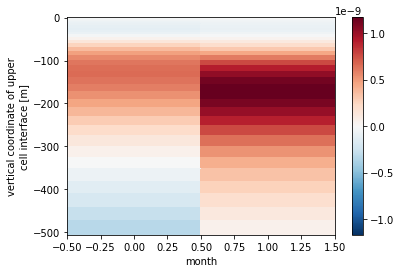

In [19]:
wpfep_m.sel(Zl=slice(0,-500)).mean('YC').T.plot()

In [33]:
advmm = -(-adwmfem + advmfem)
advpp_m = -(-adwpfep_m + advpfep_m)

In [34]:
res = dFe - ((advmm+advpp_m) + difz + ss + dadv)
res

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 399)>
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [36]:
nys,nyn = (600,1400)
with ProgressBar():
    advbb_mean = advmm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_mean = advpp_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meanz = adwpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meany = -advpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dadv_mean = dadv.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
#     kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


7
8
9
10
11
0


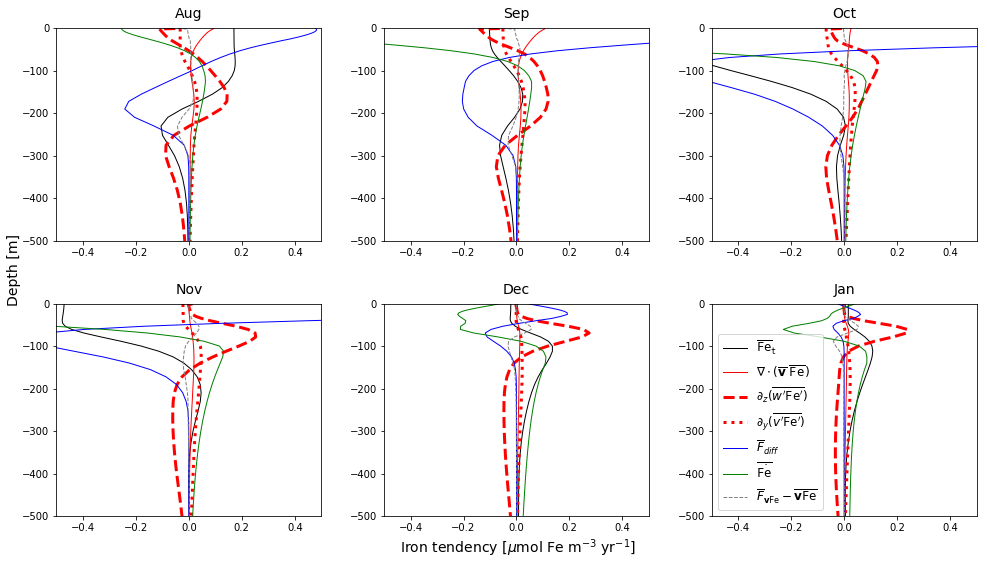

In [38]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

tkw = dict(size=4, width=1.5)
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                      lw=1, label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(advbb_mean[nn]*1e3*(360*86400), advbb_mean.Z, 'r',
                      lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}}$ $\overline{\tt Fe})$')
        axes[j,i].plot(advpp_meanz[nn]*1e3*(360*86400), advpp_mean.Z, 'r--',
                      lw=3, label=r"$\partial_z (\overline{w' {\tt Fe}'})$")
        axes[j,i].plot(advpp_meany[nn]*1e3*(360*86400), advpp_mean.Z, 'r:',
                      lw=3, label=r"$\partial_y (\overline{v' {\tt Fe}'})$")
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                      lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                      lw=1, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(dadv_mean[nn]*1e3*(360*86400), dadv_mean.Z, '--', color='grey',
                      lw=1, label=r"$\overline{F}_{\mathbf{v}{\tt Fe}} - \overline{\mathbf{v}{\tt Fe}}$")
#         axes[i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                       lw=1, label=r"Residual")
        axes[j,i].tick_params(axis='both')
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1, 5e-1])
        axes[j,i].set_ylim([-5e2, 0])
#         axes[j,i].grid(True)
        
axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_05km_wPPterms.pdf'))

# Gammas

In [81]:
u1max = 1/.67  # [1/d]
u2max = 1/.92 # [1/d]
Kp1 = 0.0175
Kp2 = 0.011
Ki1 = .95e-3
Ki2 = 6.1e-3
Kn1 = 0.035
Kn2 = 0.015
r_FeP = 1e-3
r_SiP = 16
r_NP = 16
kSi1 = Kn1 * r_SiP
kN1 = Kn1 * r_NP
kN2 = Kn2 * r_NP
kFe1 = Kn1 * r_FeP
kFe2 = Kn2 * r_FeP

In [87]:
dtype = '>f8'
shape = (12,400,200)
# par_north = 3e1+2e1*np.cos(np.pi/6*np.arange(1,13))
# par_ideal = par_north[:,np.newaxis] + np.linspace(-10,0,num=100)[np.newaxis,:]
PAR = np.fromfile(op.join(bdir,'PAR_noncos_linear_005km.bin'), 
                 dtype=dtype)
PAR.shape = shape
PAR = xr.DataArray(PAR, dims=['month','YC','XC'],
                  coords={'month':range(1,13),'YC':ds.YC.data,'XC':ds.XC.data}
                  )
I = PAR*1e6/86400
Fo_s = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2
                           * np.log(Ki2/(Kp2+Ki2))
                           )
gammaI2 = Fo_s**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)
Fo_b = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1
                           * np.log(Ki1/(Kp1+Ki1))
                           )
gammaI1 = Fo_b**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
gammaI1

<xarray.DataArray (month: 12, YC: 400, XC: 200)>
array([[[0.838159, 0.838159, ..., 0.838159, 0.838159],
        [0.837954, 0.837954, ..., 0.837954, 0.837954],
        ...,
        [0.759862, 0.759862, ..., 0.759862, 0.759862],
        [0.759674, 0.759674, ..., 0.759674, 0.759674]],

       [[0.916564, 0.916564, ..., 0.916564, 0.916564],
        [0.916355, 0.916355, ..., 0.916355, 0.916355],
        ...,
        [0.833363, 0.833363, ..., 0.833363, 0.833363],
        [0.833159, 0.833159, ..., 0.833159, 0.833159]],

       ...,

       [[0.861882, 0.861882, ..., 0.861882, 0.861882],
        [0.861673, 0.861673, ..., 0.861673, 0.861673],
        ...,
        [0.781713, 0.781713, ..., 0.781713, 0.781713],
        [0.78152 , 0.78152 , ..., 0.78152 , 0.78152 ]],

       [[0.815175, 0.815175, ..., 0.815175, 0.815175],
        [0.814974, 0.814974, ..., 0.814974, 0.814974],
        ...,
        [0.738834, 0.738834, ..., 0.738834, 0.738834],
        [0.738651, 0.738651, ..., 0.738651, 0.738651]]]

In [88]:
N2_Fe = ds.TRAC03/(ds.TRAC03+kFe2)
N1_Fe = ds.TRAC03/(ds.TRAC03+kFe1)
N2_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe

<xarray.DataArray 'TRAC03' (time: 1440, Z: 76, YC: 400, XC: 200)>
dask.array<shape=(1440, 76, 400, 200), dtype=float32, chunksize=(1, 76, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(76, 400, 200), chunksize=(76, 400, 200)>
    iter     (time) int64 dask.array<shape=(1440,), chunksize=(1,)>
  * time     (time) float64 3.297e+09 3.297e+09 3.297e+09 3.297e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [89]:
with ProgressBar():
    gamFe2_day = N2_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
    gamFe1_day = N1_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
gamFe1_day

[########################################] | 100% Completed |  2min 51.3s
[########################################] | 100% Completed | 12.8s


<xarray.DataArray 'TRAC03' (days: 360)>
array([0.192512, 0.193777, 0.194998, ..., 0.188987, 0.190217, 0.191428],
      dtype=float32)
Coordinates:
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


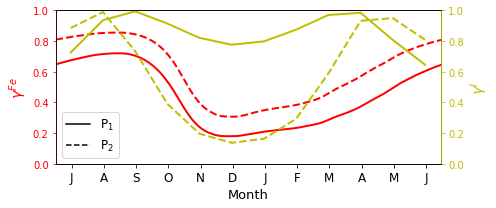

In [90]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(7,3))
fig.set_tight_layout(True)
ax2 = ax.twinx()

im, = ax.plot(range(0,360), gamFe1_day.roll(days=-180), 'r', lw=2)
ax.plot(range(0,360), gamFe2_day.roll(days=-180), 'r--', lw=2)
im2, = ax2.plot(np.linspace(14,344,12), gammaI1.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y', lw=2)
ax2.plot(np.linspace(14,344,12), gammaI2.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y--', lw=2)

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.asarray(month),-6), fontsize=12)
ax.set_xlim([0,359])
ax.set_ylim([.0,1.0])
ax2.set_ylim([.0,1.0])
ax.spines["left"].set_edgecolor(im.get_color())
ax2.spines["right"].set_edgecolor(im2.get_color())
ax.tick_params(axis='y', colors=im.get_color())
ax2.tick_params(axis='y', colors=im2.get_color())

ax.set_xlabel(r"Month", fontsize=13)
ax.set_ylabel(r'$\gamma^{Fe}$', color='r', fontsize=14)
ax2.set_ylabel(r'$\gamma^{I}$', color='y', fontsize=14)
linestyles = ['-', "--"]
dummy_lines = [ax.plot([],[], c="black", ls = linestyles[0])[0]]
dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[1])[0])
legend = ax.legend([dummy_lines[i] for i in [0,1]], ["P$_1$", "P$_2$"], loc=3, fontsize=12)
plt.savefig(op.join(pdir,'Figures/Gamma_Fe-and-PAR_05km.pdf'))

# Cross spectra

In [47]:
dsnap = open_mdsdataset(op.join(bdir,'05km_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                       grid_dir=op.join(pdir,'5km_grid'),
                       iters=range(te-int(10*360*86400/dt),te,4320),
                       prefix=['WPFe_snap'], 
                       delta_t=dt
                       )
dsnap

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 240)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [114]:
np.tile(np.roll(np.repeat(range(4),6),4),2)

array([3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 3, 3])

In [48]:
dsnap.coords['seas'] = ('time',np.tile(np.roll(np.repeat(range(4),6),4),dy))
dsnap.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wsnap = dsnap.WVEL
Fsnap = dsnap.TRAC03
# Psnap = dsnap.TRAC22 + dsnap.TRAC23
grid = Grid(dsnap,periodic=['X'])

In [87]:
seas = np.tile(np.repeat(range(4),90),dy)
ds['seas'] = ('time', seas)
ds_sea = ds.groupby('seas').mean(['time','XC','XG'])
ds_ase = ds.groupby('seas') - ds_sea
wsea = ds_sea.WVEL
Fesea = ds_sea.TRAC03
wsnapp = wsnap.groupby('seas') - wsea
Fsnapp = Fsnap.groupby('seas') - Fesea
wsnapp

<xarray.DataArray 'WVEL' (time: 240, Zl: 76, YC: 400, XC: 200)>
dask.array<shape=(240, 76, 400, 200), dtype=float32, chunksize=(1, 76, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    iter     (time) int64 dask.array<shape=(240,), chunksize=(1,)>
  * time     (time) float64 2.271e+09 2.272e+09 2.273e+09 2.274e+09 ...
    seas     (time) int64 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 ...
    month    (time) int64 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 ...

In [88]:
with ProgressBar():
    wkFek = xrft.cross_spectrum(wsnapp.sel(YC=slice(6e5,14e5)),
                                grid.interp(Fsnapp,'Z',boundary='fill').sel(YC=slice(6e5,14e5)),
                                dim=['XC'], density=False).compute()

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  4min  2.3s


In [89]:
wkFek.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wkFek

<xarray.DataArray (time: 240, Zl: 76, YC: 160, freq_XC: 200)>
array([[[[-4.568640e-16, ...,  8.388516e-16],
         ...,
         [-1.905549e-15, ...,  6.913027e-15]],

        ...,

        [[ 5.051664e-12, ...,  2.017352e-12],
         ...,
         [ 9.482633e-12, ..., -8.160425e-13]]],


       ...,


       [[[-7.785921e-16, ...,  2.260447e-15],
         ...,
         [ 1.310156e-15, ...,  5.786423e-16]],

        ...,

        [[-5.360933e-15, ...,  5.602194e-13],
         ...,
         [ 5.772624e-13, ...,  2.374581e-13]]]])
Coordinates:
  * time             (time) float64 2.271e+09 2.272e+09 2.273e+09 2.274e+09 ...
  * Zl               (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * YC               (YC) >f4 602500.0 607500.0 612500.0 617500.0 622500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06
    month            (time) int64 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 ...

In [90]:
wkFek_mon = wkFek.groupby('month').mean(['time','YC']).compute()
wkFek_mon

<xarray.DataArray (month: 12, Zl: 76, freq_XC: 200)>
array([[[ 2.222657e-16, -2.580061e-17, ...,  6.104767e-17, -2.580061e-17],
        [-5.644001e-14,  6.506978e-14, ...,  4.014153e-15,  6.506978e-14],
        ...,
        [ 4.049429e-13,  2.021587e-13, ..., -1.531557e-13,  2.021587e-13],
        [-2.774056e-13, -3.813508e-13, ..., -3.320288e-13, -3.813508e-13]],

       [[ 8.483461e-17, -4.061205e-16, ..., -5.051657e-17, -4.061205e-16],
        [-1.075298e-13,  1.332111e-14, ..., -1.322778e-13,  1.332111e-14],
        ...,
        [ 5.703473e-15,  2.131268e-13, ..., -1.516828e-13,  2.131268e-13],
        [-2.897404e-13, -3.135253e-13, ..., -4.108774e-13, -3.135253e-13]],

       ...,

       [[ 3.547275e-16,  3.706452e-15, ...,  4.316313e-15,  3.706452e-15],
        [-6.171182e-13, -1.978742e-12, ..., -1.029898e-12, -1.978742e-12],
        ...,
        [ 1.531175e-13,  3.371303e-13, ..., -2.615297e-13,  3.371303e-13],
        [ 1.816124e-15, -9.741051e-15, ..., -2.262136e-13, -9.7410

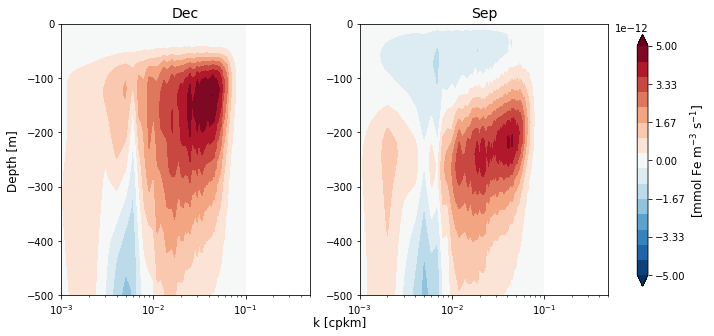

In [109]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
im = ax1.contourf(wkFek_mon.freq_XC[101:]*1e3, wkFek_mon.Zl, wkFek_mon[-1,:,101:]*wkFek_mon.freq_XC[101:],
                 cmap='RdBu_r', levels=np.linspace(-5e-12,5e-12,16), extend='both')
ax2.contourf(wkFek_mon.freq_XC[101:]*1e3, wkFek_mon.Zl, wkFek_mon[8,:,101:]*wkFek_mon.freq_XC[101:],
            cmap='RdBu_r', levels=np.linspace(-5e-12,5e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax1.set_title(r"Dec", fontsize=14)
ax2.set_title(r"Sep", fontsize=14)
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-5e-12,-3.33e-12,-1.67e-12,0,1.67e-12,3.33e-12,5e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)

fig.subplots_adjust(left=0.1)
fig.text(0.025, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=12)
fig.text(0.45, 0.05, 'k [cpkm]', 
         va='center', rotation='horizontal', fontsize=12)
plt.savefig(op.join(pdir,'Figures/wkFek_Dec-Sep_05km.pdf'))

In [8]:
dsw = xr.open_mfdataset('/swot/SUM02/takaya/channelMOC-Darwin/omega/womega_ho-qg_*.nc',
                       concat_dim='time')
dsw

<xarray.Dataset>
Dimensions:  (XC: 200, YC: 180, Zp1: 200, time: 3600)
Coordinates:
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...
  * YC       (YC) float32 552500.0 557500.0 562500.0 567500.0 572500.0 ...
  * XC       (XC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...
Dimensions without coordinates: time
Data variables:
    wa_ho    (time, Zp1, YC, XC) float64 dask.array<shape=(3600, 200, 180, 200), chunksize=(1, 200, 180, 200)>
    wa_qg    (time, Zp1, YC, XC) float64 dask.array<shape=(3600, 200, 180, 200), chunksize=(1, 200, 180, 200)>

In [51]:
dsw.Zp1[:35]

<xarray.DataArray 'Zp1' (Zp1: 35)>
array([   0.      ,  -15.075377,  -30.150754,  -45.226131,  -60.301508,
        -75.376884,  -90.452261, -105.527638, -120.603015, -135.678392,
       -150.753769, -165.829146, -180.904523, -195.979899, -211.055276,
       -226.130653, -241.20603 , -256.281407, -271.356784, -286.432161,
       -301.507538, -316.582915, -331.658291, -346.733668, -361.809045,
       -376.884422, -391.959799, -407.035176, -422.110553, -437.18593 ,
       -452.261307, -467.336683, -482.41206 , -497.487437, -512.562814])
Coordinates:
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...

In [9]:
w_meso = xr.DataArray(dsw.wa_qg.data[:,:35], dims=['time','Zp1','YC','XC'],
                     coords={'time':ds.time.data,'Zp1':dsw.Zp1.data[:35],
                            'YC':dsw.YC.data,'XC':dsw.XC.data})
w_masm = xr.DataArray(dsw.wa_ho.data[:,:35], dims=['time','Zp1','YC','XC'],
                     coords={'time':ds.time.data,'Zp1':dsw.Zp1.data[:35],
                            'YC':dsw.YC.data,'XC':dsw.XC.data})
w_sbms = w_masm - w_meso
w_sbms

<xarray.DataArray (time: 3600, Zp1: 35, YC: 180, XC: 200)>
dask.array<shape=(3600, 35, 180, 200), dtype=float64, chunksize=(1, 35, 180, 200)>
Coordinates:
  * time     (time) float64 2.271e+09 2.271e+09 2.271e+09 2.271e+09 ...
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...
  * YC       (YC) float32 552500.0 557500.0 562500.0 567500.0 572500.0 ...
  * XC       (XC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...

In [11]:
ds.Zl[:42]

<xarray.DataArray 'Zl' (Zl: 42)>
array([   0.  ,   -1.  ,   -2.14,   -3.44,   -4.93,   -6.63,   -8.56,  -10.76,
        -13.26,  -16.1 ,  -19.31,  -22.94,  -27.04,  -31.65,  -36.83,  -42.62,
        -49.09,  -56.29,  -64.27,  -73.1 ,  -82.83,  -93.52, -105.22, -117.98,
       -131.85, -146.88, -163.1 , -180.55, -199.25, -219.22, -240.49, -263.05,
       -286.92, -312.09, -338.55, -366.29, -395.29, -425.53, -456.98, -489.63,
       -523.45, -558.42], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

In [10]:
zPew = np.linspace(ds.Zp1[0], ds.Zp1[-1], 200)
w_sub = ds.WVEL.sel(YC=slice(5.5e5,14.5e5))
func = pchip(np.abs(w_sub.Zl)[:42], w_sub.data[:,:42], axis=1)
wintp = xr.DataArray(func(np.abs(zPew)[:35]), dims=['time','Zp1','YC','XC'], 
                    coords={'time':ds.time.data,'Zp1':zPew[:35],
                            'YC':w_sub.YC.data,'XC':w_sub.XC.data}
                    )
del func

In [92]:
fe_sub = ds_ase.TRAC03.sel(YC=slice(5.5e5,14.5e5))
func = pchip(np.abs(fe_sub.Z)[:42], fe_sub[:,:42], axis=1)
Feintp = xr.DataArray(func(np.abs(zPew)[:35]), dims=['time','Zp1','YC','XC'], 
                     coords={'time':ds.time.data,'Zp1':zPew[:35],
                            'YC':fe_sub.YC.data,'XC':fe_sub.XC.data}
                     )
del func

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


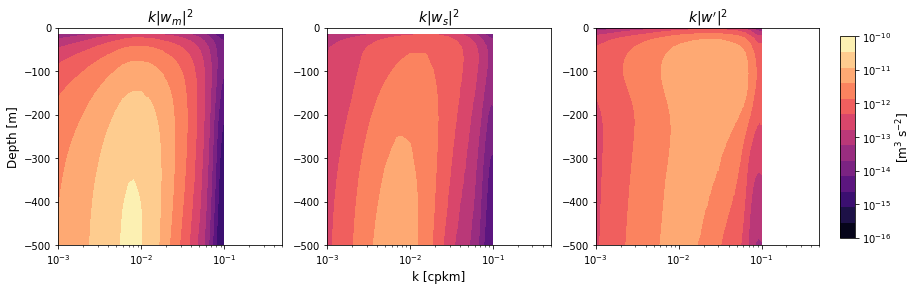

In [106]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmk_clim.freq_XC[nk:]*1e3, wmk_clim.Zp1, wmk_clim[:,nk:]*wmk_clim.freq_XC[nk:],
                 cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax2.contourf(wsk_clim.freq_XC[nk:]*1e3, wsk_clim.Zp1, wsk_clim[:,nk:]*wsk_clim.freq_XC[nk:],
            cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax3.contourf(wpk_clim.freq_XC[nk:]*1e3, wpk_clim.Zp1, wpk_clim[:,nk:]*wpk_clim.freq_XC[nk:],
            cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k|w_m|^2$", fontsize=14)
ax2.set_title(r"$k|w_s|^2$", fontsize=14)
ax3.set_title(r"$k|w'|^2$", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10])
cbar.set_label(r"[m$^{3}$ s$^{-2}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wk2-decomp_clim_05km.pdf'))

In [117]:
wmkFek15D = xrft.cross_spectrum(w_meso.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wskFek15D = xrft.cross_spectrum(w_sbms.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wpkFek15D = xrft.cross_spectrum(wp.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wmkFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wskFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wpkFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
with ProgressBar():
    wmkFek_mon = wmkFek15D.groupby('month').mean(['time','YC']).compute()
    wskFek_mon = wskFek15D.groupby('month').mean(['time','YC']).compute()
    wpkFek_mon = wpkFek15D.groupby('month').mean(['time','YC']).compute()

wmkFek_mon

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  1min 17.6s
[########################################] | 100% Completed |  1min  8.5s
[########################################] | 100% Completed | 19.1s


<xarray.DataArray (month: 12, Zp1: 35, freq_XC: 200)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-5.778068e-15, -4.421464e-15, ..., -8.080881e-15, -4.421464e-15],
        ...,
        [-4.776427e-15, -3.919678e-14, ..., -1.413656e-14, -3.919678e-14],
        [-9.135967e-15, -3.137901e-14, ..., -3.514976e-14, -3.137901e-14]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-7.723623e-15, -1.325265e-14, ..., -1.372664e-14, -1.325265e-14],
        ...,
        [-3.359924e-15, -2.372314e-14, ...,  5.242094e-14, -2.372314e-14],
        [ 6.133498e-15, -1.705838e-14, ...,  3.351823e-14, -1.705838e-14]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.189622e-13,  9.769806e-14, ...,  4.381556e-15,  9.769806e-14],
        ...,
        [-9.738112e-15,  5.950433e-14, ..., -2.720160e-14,  5.950433e-14],
        [ 3.460838e-15,  1.882956e-14, ..., -2.087540e-14,  1.882

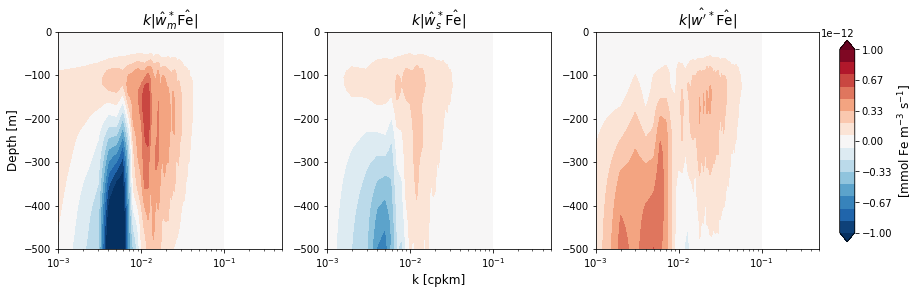

In [107]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmkFek_mon.freq_XC[nk:]*1e3, wmkFek_mon.Zp1, wmkFek_mon[-1,:,nk:]*wmkFek_mon.freq_XC[nk:],
                 cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax2.contourf(wskFek_mon.freq_XC[nk:]*1e3, wskFek_mon.Zp1, wskFek_mon[-1,:,nk:]*wskFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax3.contourf(wpkFek_mon.freq_XC[nk:]*1e3, wpkFek_mon.Zp1, wpkFek_mon[-1,:,nk:]*wpkFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k$|$\hat{w}^*_m\hat{\tt Fe}$|", fontsize=14)
ax2.set_title(r"$k$|$\hat{w}^*_s\hat{\tt Fe}$|", fontsize=14)
ax3.set_title(r"$k$|$\hat{w'}^*\hat{\tt Fe}$|", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-1e-12,-.33e-12,-.67e-12,0,.33e-12,.67e-12,1e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wkFek-decomp_05km_Dec.pdf'))

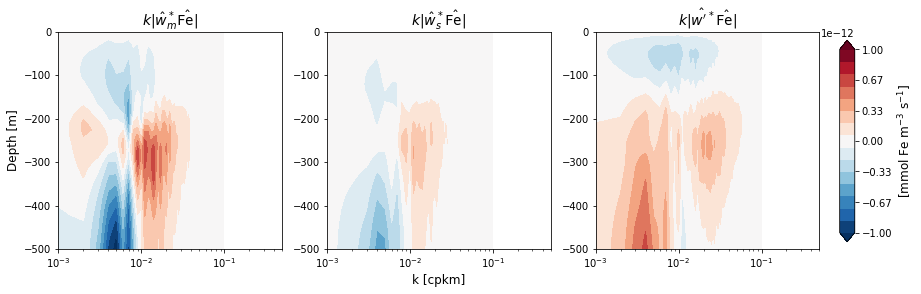

In [108]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmkFek_mon.freq_XC[nk:]*1e3, wmkFek_mon.Zp1, wmkFek_mon[8,:,nk:]*wmkFek_mon.freq_XC[nk:],
                 cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax2.contourf(wskFek_mon.freq_XC[nk:]*1e3, wskFek_mon.Zp1, wskFek_mon[8,:,nk:]*wskFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax3.contourf(wpkFek_mon.freq_XC[nk:]*1e3, wpkFek_mon.Zp1, wpkFek_mon[8,:,nk:]*wpkFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k$|$\hat{w}^*_m\hat{\tt Fe}$|", fontsize=14)
ax2.set_title(r"$k$|$\hat{w}^*_s\hat{\tt Fe}$|", fontsize=14)
ax3.set_title(r"$k$|$\hat{w'}^*\hat{\tt Fe}$|", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-1e-12,-.33e-12,-.67e-12,0,.33e-12,.67e-12,1e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wkFek-decomp_05km_Sep.pdf'))

In [19]:
wmkFek

<xarray.DataArray (time: 2160, Zp1: 20, YC: 100, freq_XC: 200)>
dask.array<shape=(2160, 20, 100, 200), dtype=float64, chunksize=(1, 20, 100, 200)>
Coordinates:
  * time             (time) float64 3.359e+09 3.359e+09 3.359e+09 3.36e+09 ...
  * Zp1              (Zp1) float64 0.0 -30.3 -60.61 -90.91 -121.2 -151.5 ...
  * YC               (YC) float32 1002500.0 1007500.0 1012500.0 1017500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06

In [118]:
nk25 = 39
nk100 = 9
wmkFek = xrft.cross_spectrum(w_meso.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
wskFek = xrft.cross_spectrum(w_sbms.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
wpkFek = xrft.cross_spectrum(wp.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
# wmFe_25 = 2*(wmkFek*wmkFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wmFe_100 = 2*(wmkFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wsFe_25 = 2*(wskFek*wskFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wsFe_100 = 2*(wskFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wpFe_25 = 2*(wpkFek*wpkFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wpFe_100 = 2*(wpkFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wmFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wmFe_100.coords['days'] = ('time',np.tile(range(360),dy))
# wsFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wsFe_100.coords['days'] = ('time',np.tile(range(360),dy))
# wpFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wpFe_100.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
#     wmFe_25_days = wmFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wmFe_100_days = wmFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
#     wsFe_25_days = wsFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wsFe_100_days = wsFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
#     wpFe_25_days = wpFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wpFe_100_days = wpFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()

wsFe_100_days

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[##############                          ] | 36% Completed |  5min  5.5s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[#############################           ] | 74% Completed | 15min 23.6s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[########################################] | 100% Completed | 23min  0.2s
[########                                ] | 20% Completed |  3min 19.1s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[######################                  ] | 55% Completed | 14min 21.3s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[####################################    ] | 91% Completed | 25min 19.3s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[######################                  ] | 55% Completed |  8min  1.9s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[########################################] | 100% Completed | 18min  4.3s


<xarray.DataArray (days: 360, Zp1: 35)>
array([[ 0.000000e+00, -4.360177e-08,  6.011820e-08, ...,  1.753648e-06,
         1.773618e-06,  1.798992e-06],
       [ 0.000000e+00, -3.072538e-08,  5.894395e-08, ...,  2.284159e-06,
         2.199499e-06,  2.140075e-06],
       [ 0.000000e+00, -3.003356e-08,  5.229921e-08, ...,  1.951183e-06,
         1.844023e-06,  1.750837e-06],
       ...,
       [ 0.000000e+00, -3.879865e-08,  5.773228e-08, ...,  1.632448e-06,
         1.624753e-06,  1.617364e-06],
       [ 0.000000e+00, -9.289291e-09,  9.999153e-08, ...,  1.618270e-06,
         1.555879e-06,  1.485656e-06],
       [ 0.000000e+00, -4.314433e-08,  6.494590e-08, ...,  1.869892e-06,
         1.853936e-06,  1.816549e-06]])
Coordinates:
  * Zp1              (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 ...
    freq_XC_spacing  float64 1e-06
  * days             (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...

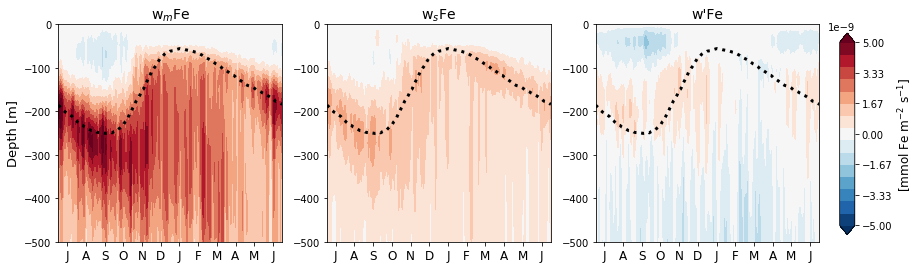

In [128]:
nys, nyn = (11e5,14e5)
dx = 5e3
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
# fig.set_tight_layout(True)
im = ax1.contourf(range(0,360), wmFe_100_days.Zp1, wmFe_100_days.T.roll(days=-180)/dx, 
                 levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
ax2.contourf(range(0,360), wsFe_100_days.Zp1, wsFe_100_days.T.roll(days=-180)/dx, 
            levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax3.contourf(range(0,360), wpFe_100_days.Zp1, wpFe_100_days.T.roll(days=-180)/dx, 
            levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([0,359])
ax2.set_xlim([0,359])
ax3.set_xlim([0,359])
ax1.set_title(r"w$_m$Fe", fontsize=14)
ax2.set_title(r"w$_s$Fe", fontsize=14)
ax3.set_title(r"w'Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-5e-9,-3.33e-9,-1.67e-9,0,1.67e-9,3.33e-9,5e-9])
cbar.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wFe_below100km_dailyclimatology_05km.pdf'))

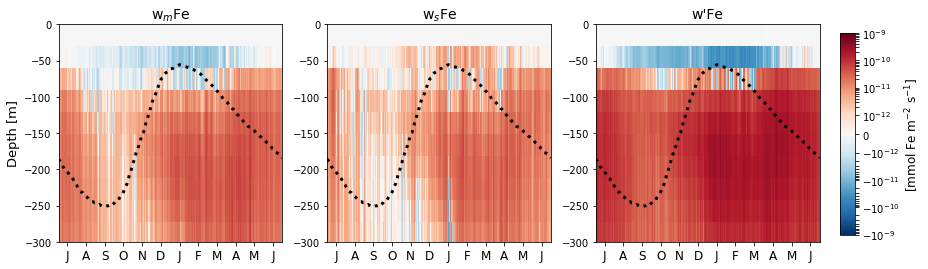

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(range(0,360), wmFe_25_days.Zp1, wmFe_25_days.T.roll(days=-12), 
                  norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
ax2.pcolormesh(range(0,360), wsFe_25_days.Zp1, wsFe_25_days.T.roll(days=-12), 
              norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax3.pcolormesh(range(0,360), wpFe_25_days.Zp1, wpFe_25_days.T.roll(days=-12), 
              norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-3e2,0])
ax2.set_ylim([-3e2,0])
ax3.set_ylim([-3e2,0])
ax1.set_xlim([0,359])
ax2.set_xlim([0,359])
ax3.set_xlim([0,359])
ax1.set_title(r"w$_m$Fe", fontsize=14)
ax2.set_title(r"w$_s$Fe", fontsize=14)
ax3.set_title(r"w'Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(pdir,'Figures/wFe_below025km_dailyclimatology_05km.pdf'))

In [25]:
5000-36*138

32

In [26]:
79*36+28

2872